# Libraries

In [1]:
options(warn=-1)
library(dplyr)
library(DataExplorer)
library(ggplot2)
library(tidyr)
library(patchwork)
library(cowplot)
library(scales)
library(tidyverse)


Dołączanie pakietu: ‘dplyr’


Następujące obiekty zostały zakryte z ‘package:stats’:

    filter, lag


Następujące obiekty zostały zakryte z ‘package:base’:

    intersect, setdiff, setequal, union



Dołączanie pakietu: ‘cowplot’


Następujący obiekt został zakryty z ‘package:patchwork’:

    align_plots


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ lubridate::stamp()  masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Introduction

## Data description

In [2]:
adult_data <- read.csv(file="data/adult.data", stringsAsFactors = TRUE, 
                       col.names=c("age", "workclass", "fnlwgt", "education", 
                                   "education.num","marital.status", "occupation", "relationship", "race","sex",
                                   "capital.gain", "capital.loss", "hours.per.week","native.country", "income"))

In [79]:
head(adult_data)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [80]:
nrow(adult_data)

[1] 32560

In [3]:
adult_test <- read.csv(file="data/adult.test", stringsAsFactors = TRUE, 
                       col.names=c("age", "workclass", "fnlwgt", "education", 
                                   "education.num","marital.status", "occupation", "relationship", "race","sex",
                                   "capital.gain", "capital.loss", "hours.per.week","native.country", "income"))

In [4]:
head(adult_test)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [5]:
nrow(adult_test)

[1] 16281

In [6]:
32560+16281

[1] 48841

## Data preprocessing

In [7]:
adult_data <- subset(adult_data, select = -education.num)
adult_test <- subset(adult_test, select = -education.num)

In [8]:
trim_factor_columns <- function(x) {
  if (is.factor(x)) {
    x <- as.factor(trimws(as.character(x)))
  }
  return(x)
}

adult_data <- adult_data %>%
  mutate_if(is.factor, trim_factor_columns)
adult_test <- adult_test %>%
  mutate_if(is.factor, trim_factor_columns)

## Missing values

In [22]:
sum(complete.cases(adult_test))

[1] 16281

In [10]:
columns_names_with_question <- names(adult_data)[sapply(adult_data, function(col) any(col == "?"))]
columns_names_with_question

[1] "workclass"      "occupation"     "native.country"

In [23]:
columns_names_with_question <- names(adult_test)[sapply(adult_test, function(col) any(col == "?"))]
columns_names_with_question

[1] "workclass"      "occupation"     "native.country"

In [24]:
names(adult_test)[sapply(adult_test, function(col) any(col == "?"))]

[1] "workclass"      "occupation"     "native.country"

In [25]:
for (col_name in columns_names_with_question) {
  adult_test[[col_name]][adult_test[[col_name]] == "?"] <- NA
}

In [26]:
columns_with_na <- colSums(is.na(adult_test)) > 0
columns_with_na

age      workclass         fnlwgt      education marital.status 
         FALSE           TRUE          FALSE          FALSE          FALSE 
    occupation   relationship           race            sex   capital.gain 
          TRUE          FALSE          FALSE          FALSE          FALSE 
  capital.loss hours.per.week native.country         income 
         FALSE          FALSE           TRUE          FALSE

In [27]:
sum(complete.cases(adult_test))

[1] 15060

In [28]:
sum(is.na(adult_test))
#some of them are for the same observation

[1] 2203

In [29]:
rows_with_na <- which(!complete.cases(adult_test))
head(adult_test[rows_with_na, c('workclass', 'occupation', 'native.country')], n=10)

,workclass,occupation,native.country
,<fct>,<fct>,<fct>
5,NA,NA,United-States
7,NA,NA,United-States
14,NA,NA,United-States
20,Private,Prof-specialty,NA
23,NA,NA,United-States
36,NA,NA,United-States
66,Private,Other-service,NA
76,NA,NA,United-States
84,Self-emp-inc,Craft-repair,NA


In [30]:
sum(is.na(adult_test$workclass))
sum(is.na(adult_test$occupation))
sum(is.na(adult_test$native.country))

[1] 963

[1] 966

[1] 274

In [31]:
963+966+274

[1] 2203

In [32]:
missing_occupation <- round(sum(is.na(adult_test$occupation))/length(adult_test$occupation) * 100, 2)
missing_workclass <- round(sum(is.na(adult_test$workclass))/length(adult_test$workclass) * 100, 2)
missing_country <- round(sum(is.na(adult_test$native.country))/length(adult_test$native.country) * 100, 2)

occupation_data <- data.frame(Label = c("Missing", "Non-Missing"),
                           Value = c(missing_occupation, 100 - missing_occupation))
workclass_data <- data.frame(Label = c("Missing", "Non-Missing"),
                           Value = c(missing_workclass, 100 - missing_workclass)) 
country_data <- data.frame(Label = c("Missing", "Non-Missing"),
                           Value = c(missing_country, 100 - missing_country))

In [33]:
create_pie_chart <- function(df, title) {
    ggplot(df, aes(x="", y= Value, fill=Label)) +
    geom_bar(stat='identity') +
    coord_polar('y')+
    labs(title=title, fill="") +
    theme_void() +
    scale_fill_manual(values = c("Missing" = "salmon", "Non-Missing" = "skyblue")) +
    geom_text(aes(label = paste0(Value, "%")), position = position_stack(vjust = 0.5), size = 6) +
    theme(legend.position = c(0.15, 0.15),
          plot.title = element_text(hjust = 0.5, size=20),
          legend.text = element_text(size = 14))
}

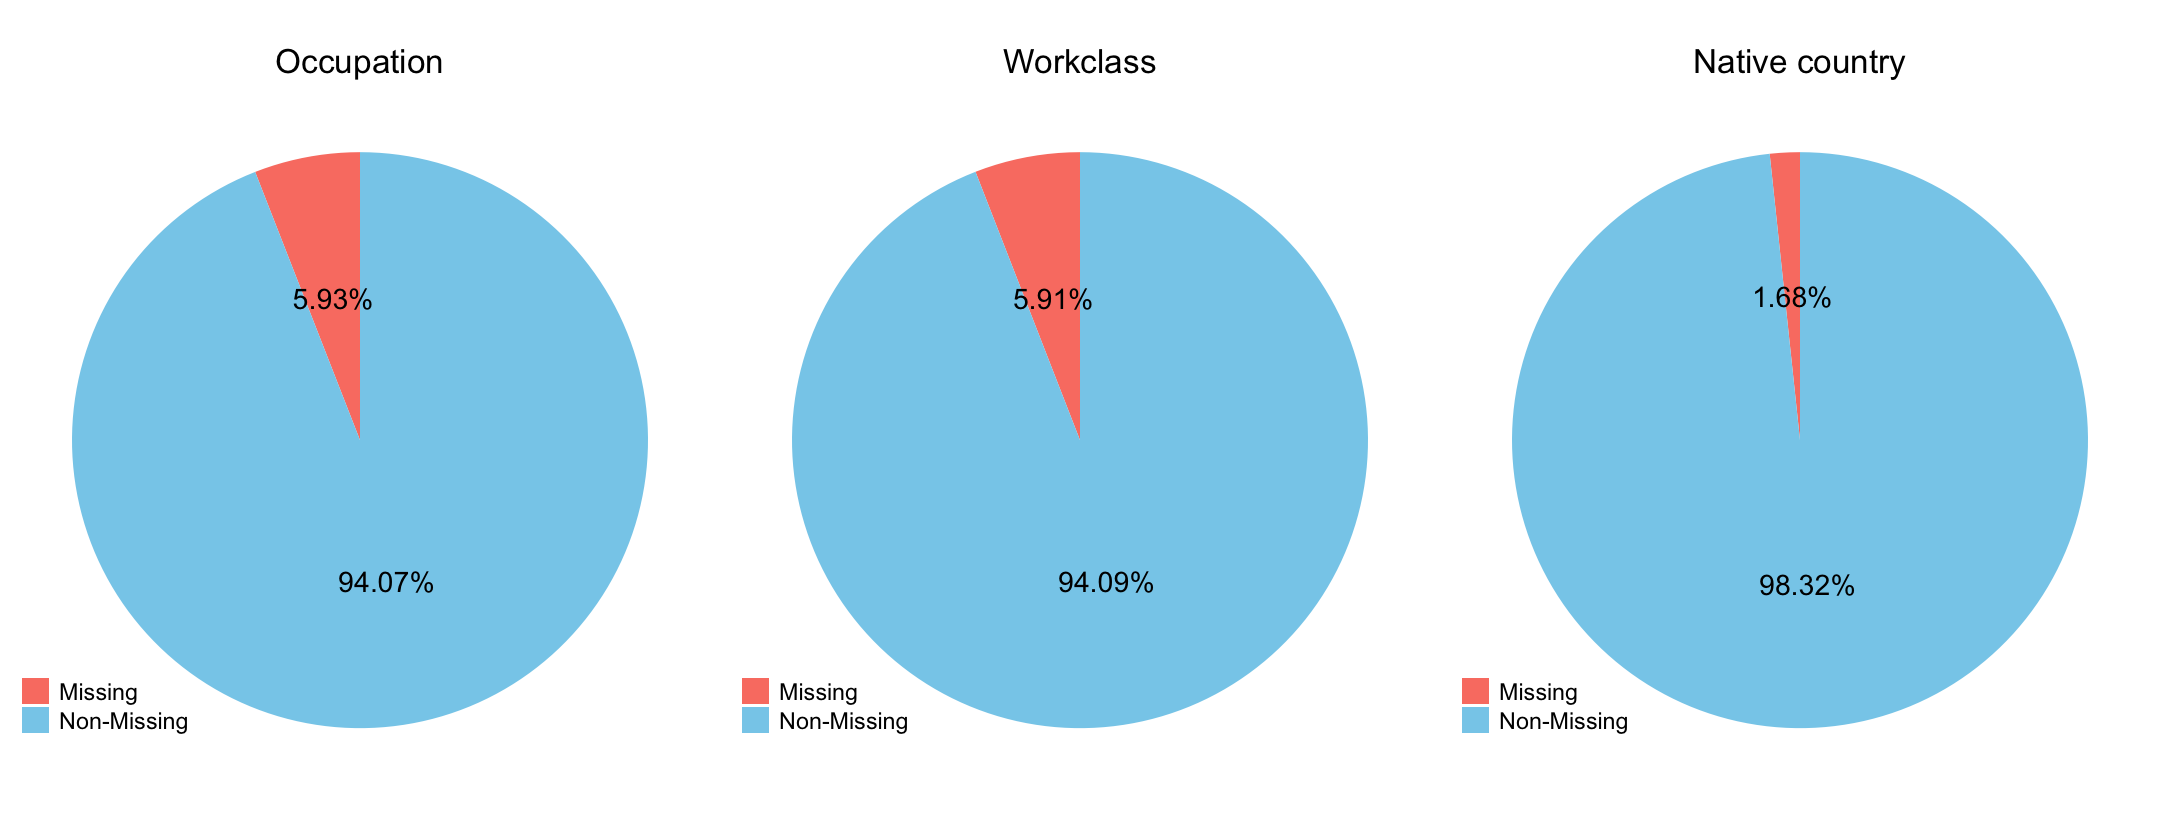

In [34]:
options(repr.plot.width=18, repr.plot.height=7)
nan_plot <- plot_grid(
  create_pie_chart(occupation_data, "Occupation"),
  create_pie_chart(workclass_data, "Workclass"),
  create_pie_chart(country_data, "Native country"),
  nrow = 1
)
nan_plot
ggsave("images/nan_pie_chart.jpg", nan_plot, width = 18, height = 7, units = "in", dpi = 300)

Let's get rid of rows with missing values and see what happens. 

In [35]:
clean_df <- na.omit(adult_test)
clean_df <- droplevels(clean_df)

In [36]:
nrow(clean_df)

[1] 15060

Check if some levels disaapeared or if sumarries of numerical columns significantly different. Check in percentages how many observations in each level went off. 

In [37]:
calculate_percentage_changes <- function(column_name) {
  summary_original <- table(adult_test[[column_name]])
  
  summary_clean <- table(clean_df[[column_name]])
  
  all_levels <- unique(c(names(summary_original), names(summary_clean)))
  
  df_original <- data.frame(level = names(summary_original), 
                            original_freq = as.numeric(summary_original) / sum(summary_original) * 100)
  df_clean <- data.frame(level = names(summary_clean), 
                         clean_freq = as.numeric(summary_clean) / sum(summary_clean) * 100)
  
  merged_df <- merge(df_original, df_clean, by = "level", all = TRUE)
  summary_original <- summary_original[all_levels]
  summary_clean <- summary_clean[all_levels]
  decrease <- summary_original - summary_clean
  percentage_decrease <- (decrease / summary_original) * 100  
  merged_df$percentage_decrease <- with(merged_df, percentage_decrease)
  
  return(merged_df)
}

In [38]:
summary(adult_data$age)
summary(clean_df$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.58   48.00   90.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.77   48.00   90.00 

In [39]:
summary(adult_test$workclass)
summary(clean_df$workclass)
as.data.frame(calculate_percentage_changes("workclass"))

?      Federal-gov        Local-gov     Never-worked 
               0              472             1043                3 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           11210              579             1321              683 
     Without-pay             NA's 
               7              963

Federal-gov        Local-gov          Private     Self-emp-inc 
             463             1033            11021              572 
Self-emp-not-inc        State-gov      Without-pay 
            1297              667                7

level,original_freq,clean_freq,percentage_decrease
<chr>,<dbl>,<dbl>,<table[1d]>
?,0.00000000,NA,NA
Federal-gov,3.08134221,3.07436919,1.9067797
Local-gov,6.80898290,6.85922975,0.9587728
Never-worked,0.01958480,NA,NA
Private,73.18187753,73.18061089,1.6859946
Self-emp-inc,3.77986682,3.79814077,1.2089810
Self-emp-not-inc,8.62384123,8.61221780,1.8168055
State-gov,4.45880663,4.42895086,2.3426061
Without-pay,0.04569787,0.04648074,0.0000000


In [40]:
filter(adult_test, workclass == "Never-worked")

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
17,Never-worked,131593,11th,Never-married,NA,Own-child,Black,Female,0,0,20,United-States,<=50K.
20,Never-worked,273905,HS-grad,Married-spouse-absent,NA,Other-relative,White,Male,0,0,35,United-States,<=50K.
18,Never-worked,162908,11th,Never-married,NA,Own-child,White,Male,0,0,35,United-States,<=50K.


In [41]:
adult_data[(is.na(adult_test$workclass) | is.na(adult_test$occupation)) & !(is.na(adult_test$workclass) & is.na(adult_test$occupation)), ]

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
8786,57,Self-emp-not-inc,217692,HS-grad,Widowed,Craft-repair,Not-in-family,White,Female,0,0,38,United-States,<=50K
11608,50,Private,98228,HS-grad,Divorced,Sales,Unmarried,White,Female,0,0,45,United-States,<=50K
13899,43,Private,106760,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,50,Canada,>50K
25067,18,NA,71076,HS-grad,Never-married,NA,Own-child,White,Male,0,0,40,United-States,<=50K
27889,17,Private,56536,11th,Never-married,Sales,Own-child,White,Female,1055,0,18,India,<=50K
30180,37,Private,89718,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States,<=50K


In [42]:
filter(adult_test, is.na(occupation))

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
18,NA,103497,Some-college,Never-married,NA,Own-child,White,Female,0,0,30,United-States,<=50K.
29,NA,227026,HS-grad,Never-married,NA,Unmarried,Black,Male,0,0,40,United-States,<=50K.
58,NA,299831,HS-grad,Married-civ-spouse,NA,Husband,White,Male,0,0,35,United-States,<=50K.
72,NA,132015,7th-8th,Divorced,NA,Not-in-family,White,Female,0,0,6,United-States,<=50K.
65,NA,191846,HS-grad,Married-civ-spouse,NA,Husband,White,Male,0,0,40,United-States,<=50K.
17,NA,165361,10th,Never-married,NA,Own-child,White,Male,0,0,40,United-States,<=50K.
41,NA,38434,Masters,Married-civ-spouse,NA,Wife,White,Female,7688,0,10,United-States,>50K.
51,NA,189762,Some-college,Married-civ-spouse,NA,Wife,White,Female,0,0,18,United-States,<=50K.
20,NA,30796,HS-grad,Never-married,NA,Own-child,White,Female,0,0,20,United-States,<=50K.


In [43]:
filter(adult_test, is.na(native.country))

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
40,Private,85019,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NA,>50K.
41,Private,109912,Bachelors,Never-married,Other-service,Not-in-family,White,Female,0,0,40,NA,<=50K.
44,Self-emp-inc,223881,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NA,>50K.
34,State-gov,513100,Bachelors,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,NA,<=50K.
42,Federal-gov,177937,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,NA,<=50K.
37,Local-gov,263690,Bachelors,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,NA,<=50K.
64,Self-emp-not-inc,71807,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,NA,>50K.
27,Private,500068,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,0,0,36,NA,<=50K.
65,Private,88145,1st-4th,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0,0,40,NA,<=50K.


In [126]:
filter(adult_data, is.na(workclass))

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
54,NA,180211,Some-college,Married-civ-spouse,NA,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
32,NA,293936,7th-8th,Married-spouse-absent,NA,Not-in-family,White,Male,0,0,40,NA,<=50K
25,NA,200681,Some-college,Never-married,NA,Own-child,White,Male,0,0,40,United-States,<=50K
67,NA,212759,10th,Married-civ-spouse,NA,Husband,White,Male,0,0,2,United-States,<=50K
17,NA,304873,10th,Never-married,NA,Own-child,White,Female,34095,0,32,United-States,<=50K
35,NA,129305,HS-grad,Married-civ-spouse,NA,Husband,White,Male,0,0,40,United-States,<=50K
43,NA,174662,Some-college,Divorced,NA,Not-in-family,White,Female,0,0,40,United-States,<=50K
52,NA,252903,HS-grad,Divorced,NA,Not-in-family,White,Male,0,0,45,United-States,>50K
68,NA,38317,1st-4th,Divorced,NA,Not-in-family,White,Female,0,0,20,United-States,<=50K


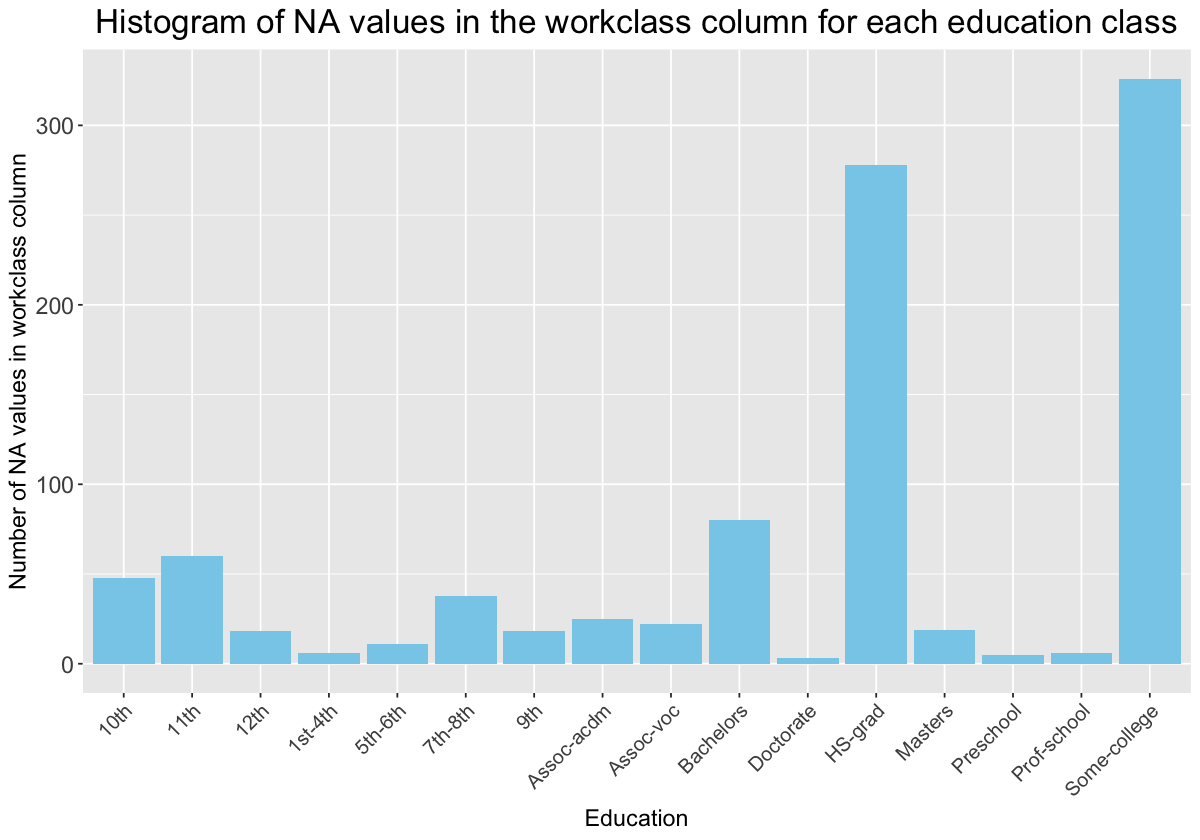

In [44]:
na_count <- adult_test %>%
  group_by(education, workclass) %>%
  summarise(na_count = sum(is.na(workclass)), .groups = "drop")

options(repr.plot.width=10, repr.plot.height=7)

workclass_na_hist <- ggplot(na_count, aes(x = education, y = na_count, fill = workclass)) +
  geom_bar(stat = "identity", position = "dodge", fill = 'skyblue') +
  labs(title = "Histogram of NA values in the workclass column for each education class",
       x = "Education",
       y = "Number of NA values in workclass column") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=12),
          axis.text.y = element_text(size=14),
          axis.title = element_text(size=14),
          plot.title = element_text(hjust = 0.5, size=20)) +
  guides(fill = FALSE)

workclass_na_hist

ggsave("images/workclass_na_hist.jpg", workclass_na_hist, width = 10, height = 7, units = "in", dpi = 300)

In [45]:
summary(adult_test$fnlwgt)
summary(clean_df$fnlwgt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13492  116736  177831  189436  238384 1490400 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13492  116655  177955  189616  238589 1490400 

In [46]:
summary(adult_test$education)
summary(clean_df$education)
as.data.frame(calculate_percentage_changes("education"))

10th         11th         12th      1st-4th      5th-6th      7th-8th 
         456          637          224           79          176          309 
         9th   Assoc-acdm    Assoc-voc    Bachelors    Doctorate      HS-grad 
         242          534          679         2670          181         5283 
     Masters    Preschool  Prof-school Some-college 
         934           32          258         3587

10th         11th         12th      1st-4th      5th-6th      7th-8th 
         403          571          200           71          161          266 
         9th   Assoc-acdm    Assoc-voc    Bachelors    Doctorate      HS-grad 
         221          499          652         2526          169         4943 
     Masters    Preschool  Prof-school Some-college 
         887           27          243         3221

level,original_freq,clean_freq,percentage_decrease
<chr>,<dbl>,<dbl>,<table[1d]>
10th,2.8008108,2.6759628,11.622807
11th,3.9125361,3.7915007,10.361068
12th,1.3758369,1.3280212,10.714286
1st-4th,0.4852282,0.4714475,10.126582
5th-6th,1.0810147,1.0690571,8.522727
7th-8th,1.8979178,1.7662683,13.915858
9th,1.4863952,1.4674635,8.677686
Assoc-acdm,3.2798968,3.3134130,6.554307
Assoc-voc,4.1705055,4.3293493,3.976436


In [47]:
summary(adult_test$marital.status)
summary(clean_df$marital.status)
as.data.frame(calculate_percentage_changes("marital.status"))

Divorced     Married-AF-spouse    Married-civ-spouse 
                 2190                    14                  7403 
Married-spouse-absent         Never-married             Separated 
                  210                  5434                   505 
              Widowed 
                  525

Divorced     Married-AF-spouse    Married-civ-spouse 
                 2083                    11                  6990 
Married-spouse-absent         Never-married             Separated 
                  182                  4872                   472 
              Widowed 
                  450

level,original_freq,clean_freq,percentage_decrease
<chr>,<dbl>,<dbl>,<table[1d]>
Divorced,13.4512622,13.83134130,4.885845
Married-AF-spouse,0.0859898,0.07304117,21.428571
Married-civ-spouse,45.4701800,46.41434263,5.578819
Married-spouse-absent,1.2898471,1.20849934,13.333333
Never-married,33.3763282,32.35059761,10.342289
Separated,3.1017751,3.13413015,6.534653
Widowed,3.2246177,2.98804781,14.285714


In [48]:
summary(adult_test$occupation)
summary(clean_df$occupation)
as.data.frame(calculate_percentage_changes("occupation"))

?      Adm-clerical      Armed-Forces      Craft-repair 
                0              1841                 6              2013 
  Exec-managerial   Farming-fishing Handlers-cleaners Machine-op-inspct 
             2020               496               702              1020 
    Other-service   Priv-house-serv    Prof-specialty   Protective-serv 
             1628                93              2032               334 
            Sales      Tech-support  Transport-moving              NA's 
             1854               518               758               966

Adm-clerical      Armed-Forces      Craft-repair   Exec-managerial 
             1819                 5              1990              1992 
  Farming-fishing Handlers-cleaners Machine-op-inspct     Other-service 
              491               696              1004              1596 
  Priv-house-serv    Prof-specialty   Protective-serv             Sales 
               89              1970               332              1824 
     Tech-support  Transport-moving 
              508               744

level,original_freq,clean_freq,percentage_decrease
<chr>,<dbl>,<dbl>,<table[1d]>
?,0.00000000,NA,NA
Adm-clerical,12.02089455,12.07835325,1.1950027
Armed-Forces,0.03917728,0.03320053,16.6666667
Craft-repair,13.14397649,13.21381142,1.1425733
Exec-managerial,13.18968332,13.22709163,1.3861386
Farming-fishing,3.23865491,3.26029216,1.0080645
Handlers-cleaners,4.58374143,4.62151394,0.8547009
Machine-op-inspct,6.66013712,6.66666667,1.5686275
Other-service,10.63010121,10.59760956,1.9656020


In [256]:
summary(adult_data$relationship)
summary(clean_df$relationship)
as.data.frame(calculate_percentage_changes("relationship"))

Husband  Not-in-family Other-relative      Own-child      Unmarried 
         13193           8304            981           5068           3446 
          Wife 
          1568

Husband  Not-in-family Other-relative      Own-child      Unmarried 
         12463           7725            889           4466           3212 
          Wife 
          1406

level,original_freq,clean_freq,percentage_decrease
<chr>,<dbl>,<dbl>,<table[1d]>
Husband,40.519042,41.321574,5.533237
Not-in-family,25.503686,25.612546,6.972543
Other-relative,3.012899,2.947515,9.378186
Own-child,15.565111,14.807201,11.878453
Unmarried,10.583538,10.649514,6.790482
Wife,4.815725,4.661649,10.331633


In [49]:
summary(adult_test$race)
summary(clean_df$race)
as.data.frame(calculate_percentage_changes("race"))

Amer-Indian-Eskimo Asian-Pac-Islander              Black              Other 
               159                480               1561                135 
             White 
             13946

Amer-Indian-Eskimo Asian-Pac-Islander              Black              Other 
               149                408               1411                122 
             White 
             12970

level,original_freq,clean_freq,percentage_decrease
<chr>,<dbl>,<dbl>,<table[1d]>
Amer-Indian-Eskimo,0.9765985,0.9893758,6.289308
Asian-Pac-Islander,2.9482219,2.7091633,15.000000
Black,9.5878632,9.3691899,9.609225
Other,0.8291874,0.8100930,9.629630
White,85.6581291,86.1221780,6.998422


In [50]:
summary(adult_test$sex)
summary(clean_df$sex)
as.data.frame(calculate_percentage_changes("sex"))

Female   Male 
  5421  10860

Female   Male 
  4913  10147

level,original_freq,clean_freq,percentage_decrease
<chr>,<dbl>,<dbl>,<table[1d]>
Female,33.29648,32.62284,9.370965
Male,66.70352,67.37716,6.565378


In [51]:
summary(adult_test$capital.gain)
summary(clean_df$capital.gain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0    1082       0   99999 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0    1120       0   99999 

In [52]:
summary(adult_test$capital.loss)
summary(clean_df$capital.loss)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0    87.9     0.0  3770.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   89.04    0.00 3770.00 

In [53]:
summary(adult_test$hours.per.week)
summary(clean_df$hours.per.week)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   40.00   40.39   45.00   99.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   40.00   40.95   45.00   99.00 

In [54]:
unique(adult_test$hours.per.week)

[1] 40 50 30 32 10 39 35 48 25 20 45 47  6 43 90 54 60 38 36 18 24 44 56 28 16
[26] 41 22 55 14 33 37  8 12 70 15 75 52 84 42 80 68 99 65  5 17 72 53 29 96 21
[51] 46  3  1 23 49 67 76  7  2 58 26 34  4 51 78 63 31 92 77 27 85 13 19 98 62
[76] 66 57 11 86 59  9 64 73 61 88 79 89 74 69

In [55]:
summary(adult_test$native.country)
summary(clean_df$native.country)
as.data.frame(calculate_percentage_changes("native.country"))

?                   Cambodia 
                         0                          9 
                    Canada                      China 
                        61                         47 
                  Columbia                       Cuba 
                        26                         43 
        Dominican-Republic                    Ecuador 
                        33                         17 
               El-Salvador                    England 
                        49                         37 
                    France                    Germany 
                         9                         69 
                    Greece                  Guatemala 
                        20                         24 
                     Haiti                   Honduras 
                        31                          7 
                      Hong                    Hungary 
                        10                          6 
                     India                       Iran 
                        51                         16 
                   Ireland                      Italy 
                        13                         32 
                   Jamaica                      Japan 
                        25                         30 
                      Laos                     Mexico 
                         5                        308 
                 Nicaragua Outlying-US(Guam-USVI-etc) 
                        15                          9 
                      Peru                Philippines 
                        15                         97 
                    Poland                   Portugal 
                        27                         30 
               Puerto-Rico                   Scotland 
                        70                          9 
                     South                     Taiwan 
                        35                         14 
                  Thailand            Trinadad&Tobago 
                        12                          8 
             United-States                    Vietnam 
                     14662                         19 
                Yugoslavia                       NA's 
                         7                        274

Cambodia                     Canada 
                         8                         56 
                     China                   Columbia 
                        45                         26 
                      Cuba         Dominican-Republic 
                        41                         30 
                   Ecuador                El-Salvador 
                        16                         47 
                   England                     France 
                        33                          9 
                   Germany                     Greece 
                        65                         20 
                 Guatemala                      Haiti 
                        23                         27 
                  Honduras                       Hong 
                         7                          9 
                   Hungary                      India 
                         5                         47 
                      Iran                    Ireland 
                        14                         12 
                     Italy                    Jamaica 
                        32                         23 
                     Japan                       Laos 
                        30                          4 
                    Mexico                  Nicaragua 
                       293                         15 
Outlying-US(Guam-USVI-etc)                       Peru 
                         8                         15 
               Philippines                     Poland 
                        95                         25 
                  Portugal                Puerto-Rico 
                        28                         66 
                  Scotland                      South 
                         9                         30 
                    Taiwan                   Thailand 
                        13                         12 
           Trinadad&Tobago              United-States 
                         8                      13788 
                   Vietnam                 Yugoslavia 
                        19                          7

level,original_freq,clean_freq,percentage_decrease
<chr>,<dbl>,<dbl>,<table[1d]>
?,0.00000000,NA,NA
Cambodia,0.05622540,0.05312085,11.111111
Canada,0.38108328,0.37184595,8.196721
China,0.29362154,0.29880478,4.255319
Columbia,0.16242894,0.17264276,0.000000
Cuba,0.26863247,0.27224436,4.651163
Dominican-Republic,0.20615981,0.19920319,9.090909
Ecuador,0.10620354,0.10624170,5.882353
El-Salvador,0.30611607,0.31208499,4.081633


In [56]:
summary(adult_test$income)
summary(clean_df$income)
as.data.frame(calculate_percentage_changes("income"))

<=50K.  >50K. 
 12435   3846

<=50K.  >50K. 
 11360   3700

level,original_freq,clean_freq,percentage_decrease
<chr>,<dbl>,<dbl>,<table[1d]>
<=50K.,76.37737,75.43161,8.644954
>50K.,23.62263,24.56839,3.796152


And now check the contigency tables before and after cleaning.

In [57]:
cont_table <- function(df, column) {
  result <- df %>%
    group_by({{column}}, income, .drop = FALSE) %>%
    summarise(count = n(), .groups = "drop_last") %>%
    ungroup() %>%
    pivot_wider(names_from = {{column}}, values_from = count, values_fill = 0)
  return(result)
}

In [58]:
cont_table(adult_test, workclass)
cont_table(clean_df, workclass)

income,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,NA
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K.,0,282,733,3,8786,263,968,506,5,889
>50K.,0,190,310,0,2424,316,353,177,2,74


income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K.,279,727,8646,260,952,491,5
>50K.,184,306,2375,312,345,176,2


In [59]:
cont_table(adult_test, education)
cont_table(clean_df, education)

income,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K.,431,605,209,77,165,287,228,386,518,1578,56,4455,434,31,64,2911
>50K.,25,32,15,2,11,22,14,148,161,1092,125,828,500,1,194,676


income,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K.,380,541,186,69,151,246,208,357,492,1474,50,4144,412,26,57,2567
>50K.,23,30,14,2,10,20,13,142,160,1052,119,799,475,1,186,654


In [60]:
cont_table(adult_test, marital.status)
cont_table(clean_df, marital.status)

income,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K.,1982,10,4111,186,5192,472,482
>50K.,208,4,3292,24,242,33,43


income,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K.,1880,7,3825,159,4641,439,409
>50K.,203,4,3165,23,231,33,41


In [61]:
cont_table(adult_test, occupation)
cont_table(clean_df, occupation)

income,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,NA
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K.,0,1580,2,1559,1080,438,650,898,1561,91,1107,237,1362,381,597,892
>50K.,0,261,4,454,940,58,52,122,67,2,925,97,492,137,161,74


income,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K.,1561,2,1543,1062,434,644,884,1532,87,1077,235,1339,375,585
>50K.,258,3,447,930,57,52,120,64,2,893,97,485,133,159


In [62]:
cont_table(adult_test, relationship)
cont_table(clean_df, relationship)

income,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
<fct>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K.,3595,3858,510,2469,1588,415
>50K.,2928,420,15,44,91,348


income,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
<fct>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K.,3375,3571,445,2119,1487,363
>50K.,2828,405,15,41,89,322


In [63]:
cont_table(adult_test, race)
cont_table(clean_df, race)

income,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
<fct>,<int>,<int>,<int>,<int>,<int>
<=50K.,140,347,1382,110,10456
>50K.,19,133,179,25,3490


income,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
<fct>,<int>,<int>,<int>,<int>,<int>
<=50K.,130,287,1243,98,9602
>50K.,19,121,168,24,3368


In [64]:
cont_table(adult_test,sex)
cont_table(clean_df, sex)

income,Female,Male
<fct>,<int>,<int>
<=50K.,4831,7604
>50K.,590,3256


income,Female,Male
<fct>,<int>,<int>
<=50K.,4356,7004
>50K.,557,3143


In [156]:
cont_table(adult_data, native.country)
cont_table(clean_df,  native.country)

income,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,⋯,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,NA
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K,0,12,82,55,57,70,68,24,97,⋯,102,9,64,31,15,17,21998,62,10,437
>50K,0,7,39,20,2,25,2,4,9,⋯,12,3,16,20,3,2,7171,5,6,146


income,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,⋯,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K,11,71,48,54,67,65,23,91,56,⋯,30,97,9,57,23,14,16,20508,59,10
>50K,7,36,20,2,25,2,4,9,30,⋯,4,12,2,14,19,3,2,6995,5,6


In [65]:
write.csv(clean_df, file = "data/clean_test.csv", row.names = FALSE)

# Descriptive analysis and data visualization

## Basic characteristics

In [155]:
clean_data <- read.csv('data/clean_data.csv', stringsAsFactors = TRUE)

In [151]:
nrow(clean_data)

[1] 30161

In [148]:
str(clean_data)

'data.frame':	30161 obs. of  14 variables:
 $ age           : int  50 38 53 28 37 49 52 31 42 37 ...
 $ workclass     : chr  "Self-emp-not-inc" "Private" "Private" "Private" ...
 $ fnlwgt        : int  83311 215646 234721 338409 284582 160187 209642 45781 159449 280464 ...
 $ education     : chr  "Bachelors" "HS-grad" "11th" "Bachelors" ...
 $ marital.status: chr  "Married-civ-spouse" "Divorced" "Married-civ-spouse" "Married-civ-spouse" ...
 $ occupation    : chr  "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" "Prof-specialty" ...
 $ relationship  : chr  "Husband" "Not-in-family" "Husband" "Wife" ...
 $ race          : chr  "White" "White" "Black" "Black" ...
 $ sex           : chr  "Male" "Male" "Male" "Female" ...
 $ capital.gain  : int  0 0 0 0 0 0 0 14084 5178 0 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  13 40 40 40 40 16 45 50 40 80 ...
 $ native.country: chr  "United-States" "United-States" "United-States" "Cuba" ...
 $ income        : 

In [150]:
num_unique_values <- sapply(clean_data, function(x) length(unique(x)))

for (i in 1:length(num_unique_values)) {
  print(paste0(names(num_unique_values)[i], ": ", num_unique_values[i]))
}

[1] "age: 72"
[1] "workclass: 7"
[1] "fnlwgt: 20262"
[1] "education: 16"
[1] "marital.status: 7"
[1] "occupation: 14"
[1] "relationship: 6"
[1] "race: 5"
[1] "sex: 2"
[1] "capital.gain: 118"
[1] "capital.loss: 90"
[1] "hours.per.week: 94"
[1] "native.country: 41"
[1] "income: 2"


In [204]:
numerical_columns <- names(clean_data[sapply(clean_data, is.numeric)])
factor_columns <- names(clean_data[sapply(clean_data, is.factor)])

In [162]:
#summary(adult_data[factor_columns])

In [163]:
#summary(adult_data[numerical_columns])

## Exploratory data analysis

### Whole data set

#### Bar plots

In [162]:
bar_plots <- lapply(factor_columns, function(column) {
    ggplot(clean_data, aes_string(x = column)) +
    geom_bar(fill='skyblue') +
    labs(title = column) +
    scale_y_continuous(breaks = pretty_breaks(n = 6)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size=14),
          axis.text.y = element_text(size=14),
          axis.title.x = element_blank(),
          plot.title = element_text(hjust = 0.5, size=20))
})

In [168]:
options(repr.plot.width=18, repr.plot.height=20)
plot_grid1 <- plot_grid(plotlist = bar_plots, ncol = 3, align = "h")
ggsave("images/barplots1.jpg", plot_grid1, width = 18, height = 20, units = "in", dpi = 300)

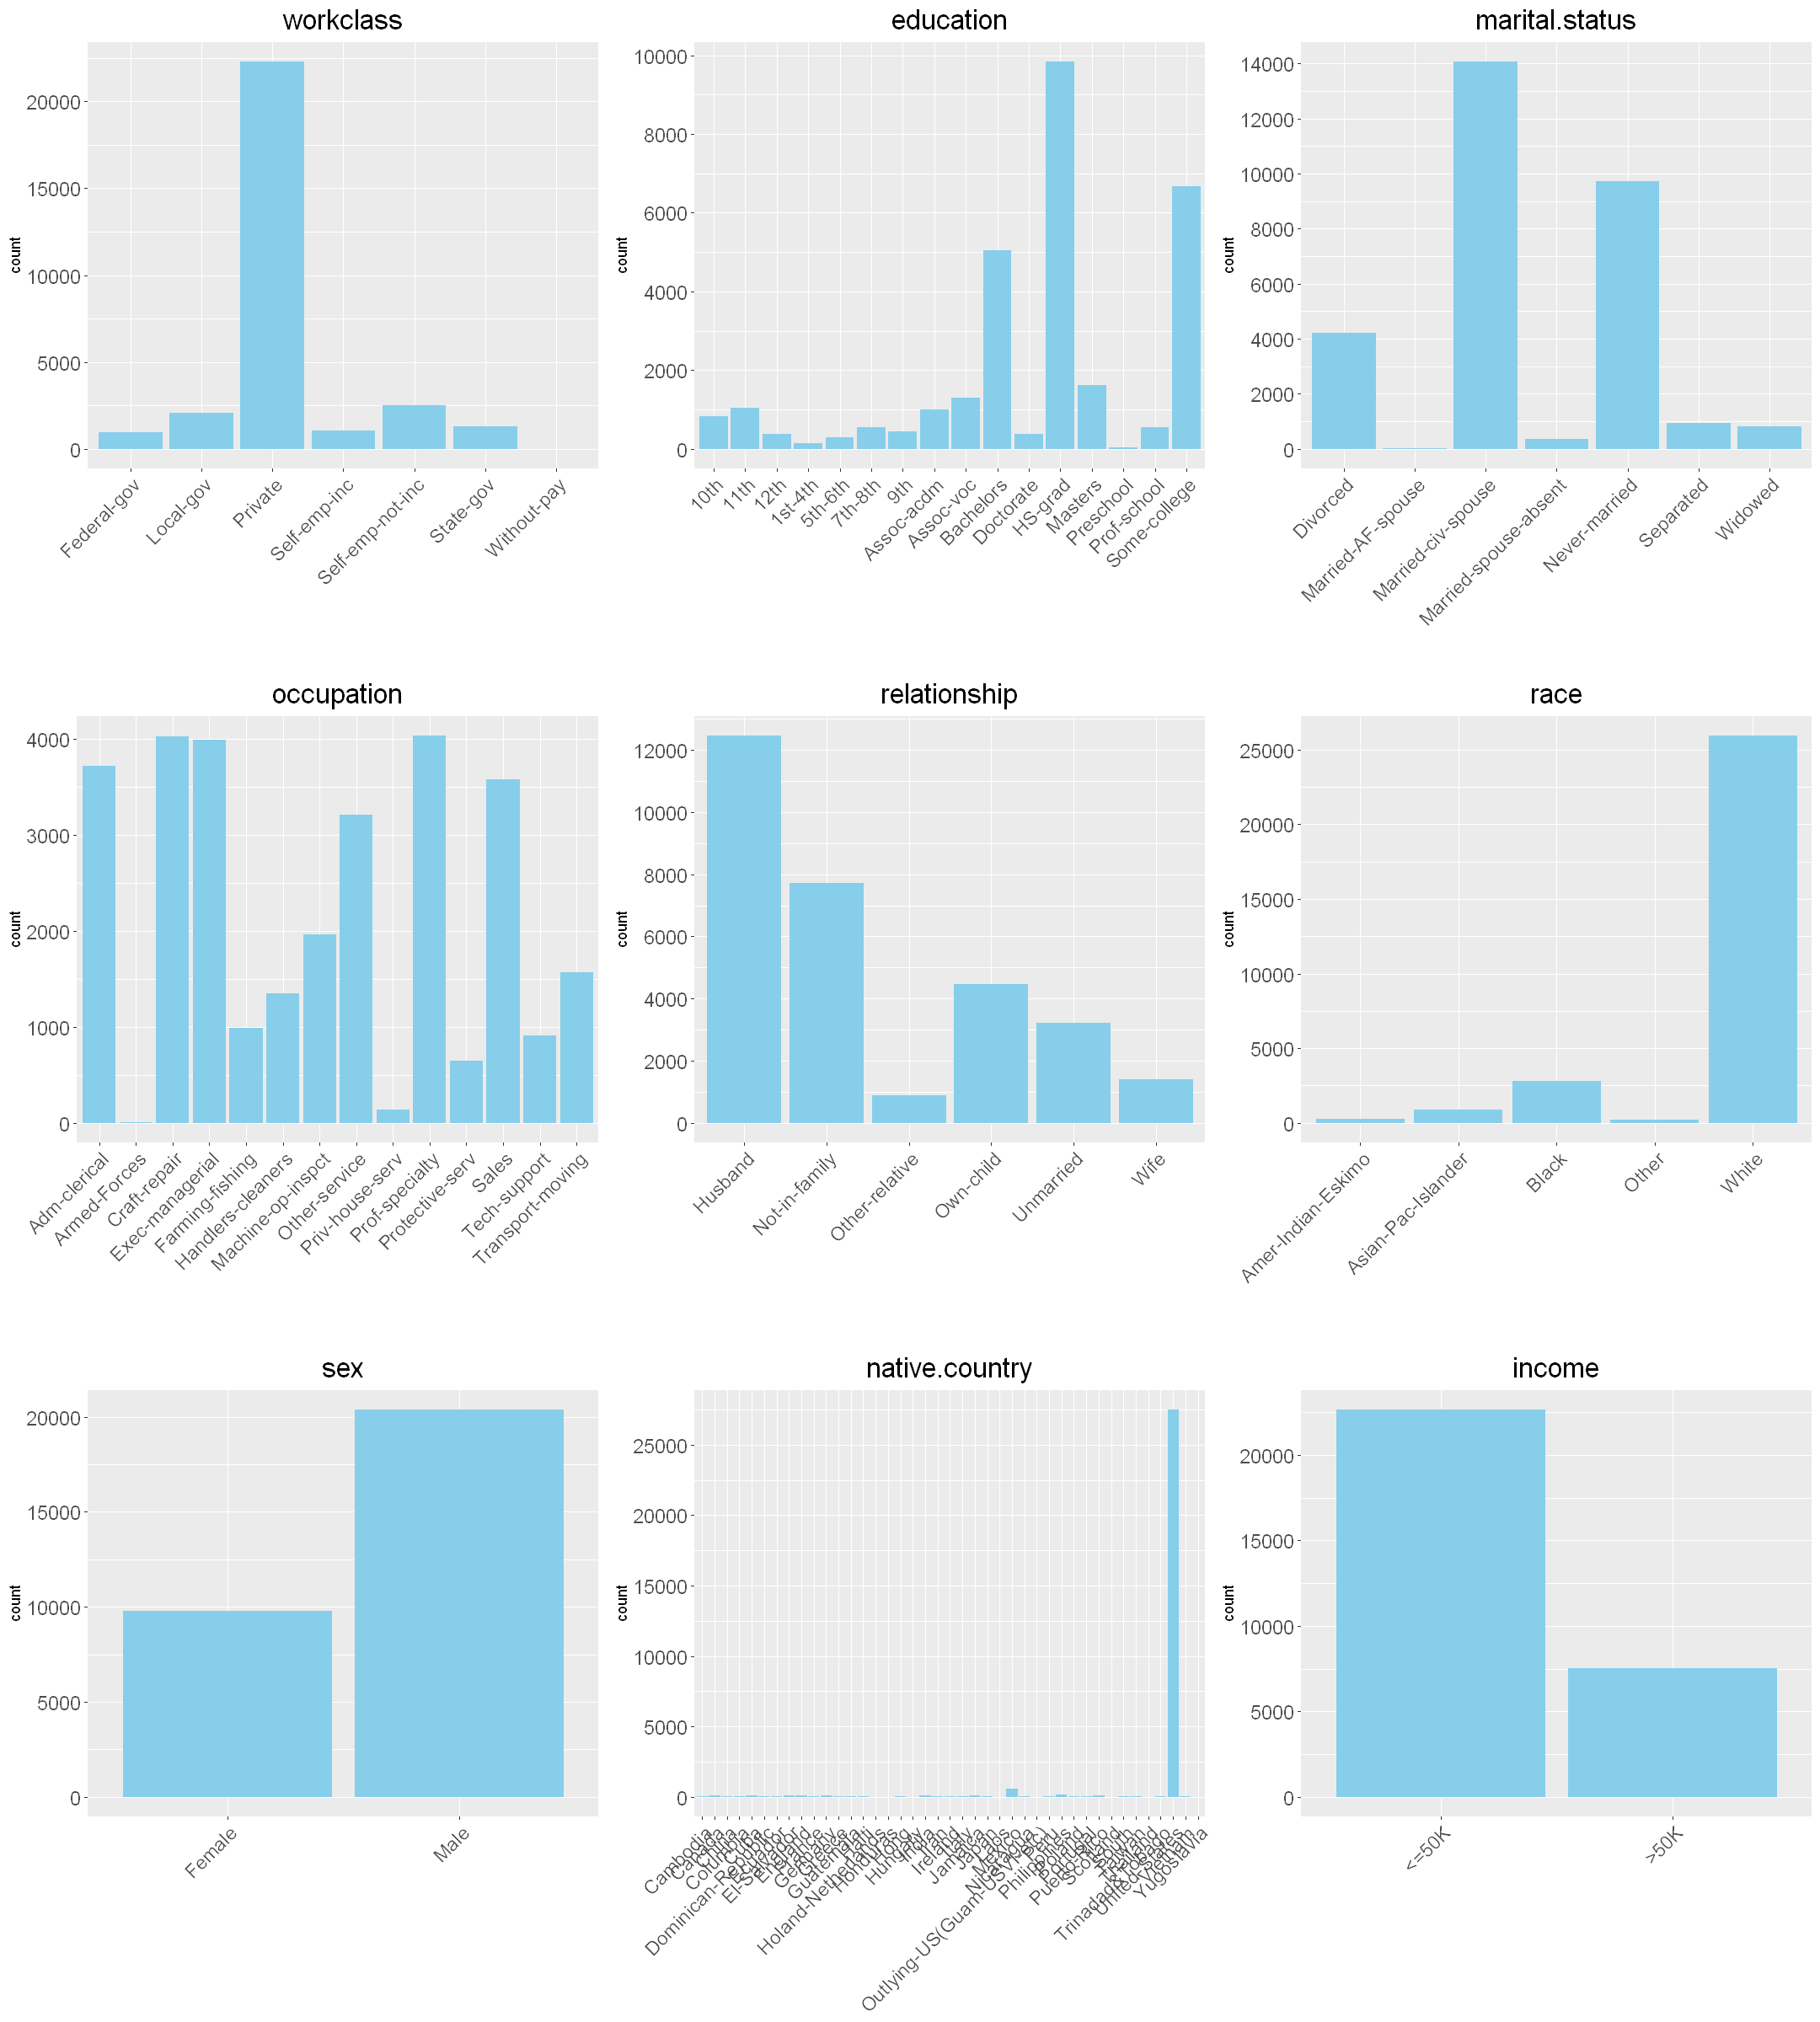

In [169]:
plot_grid1

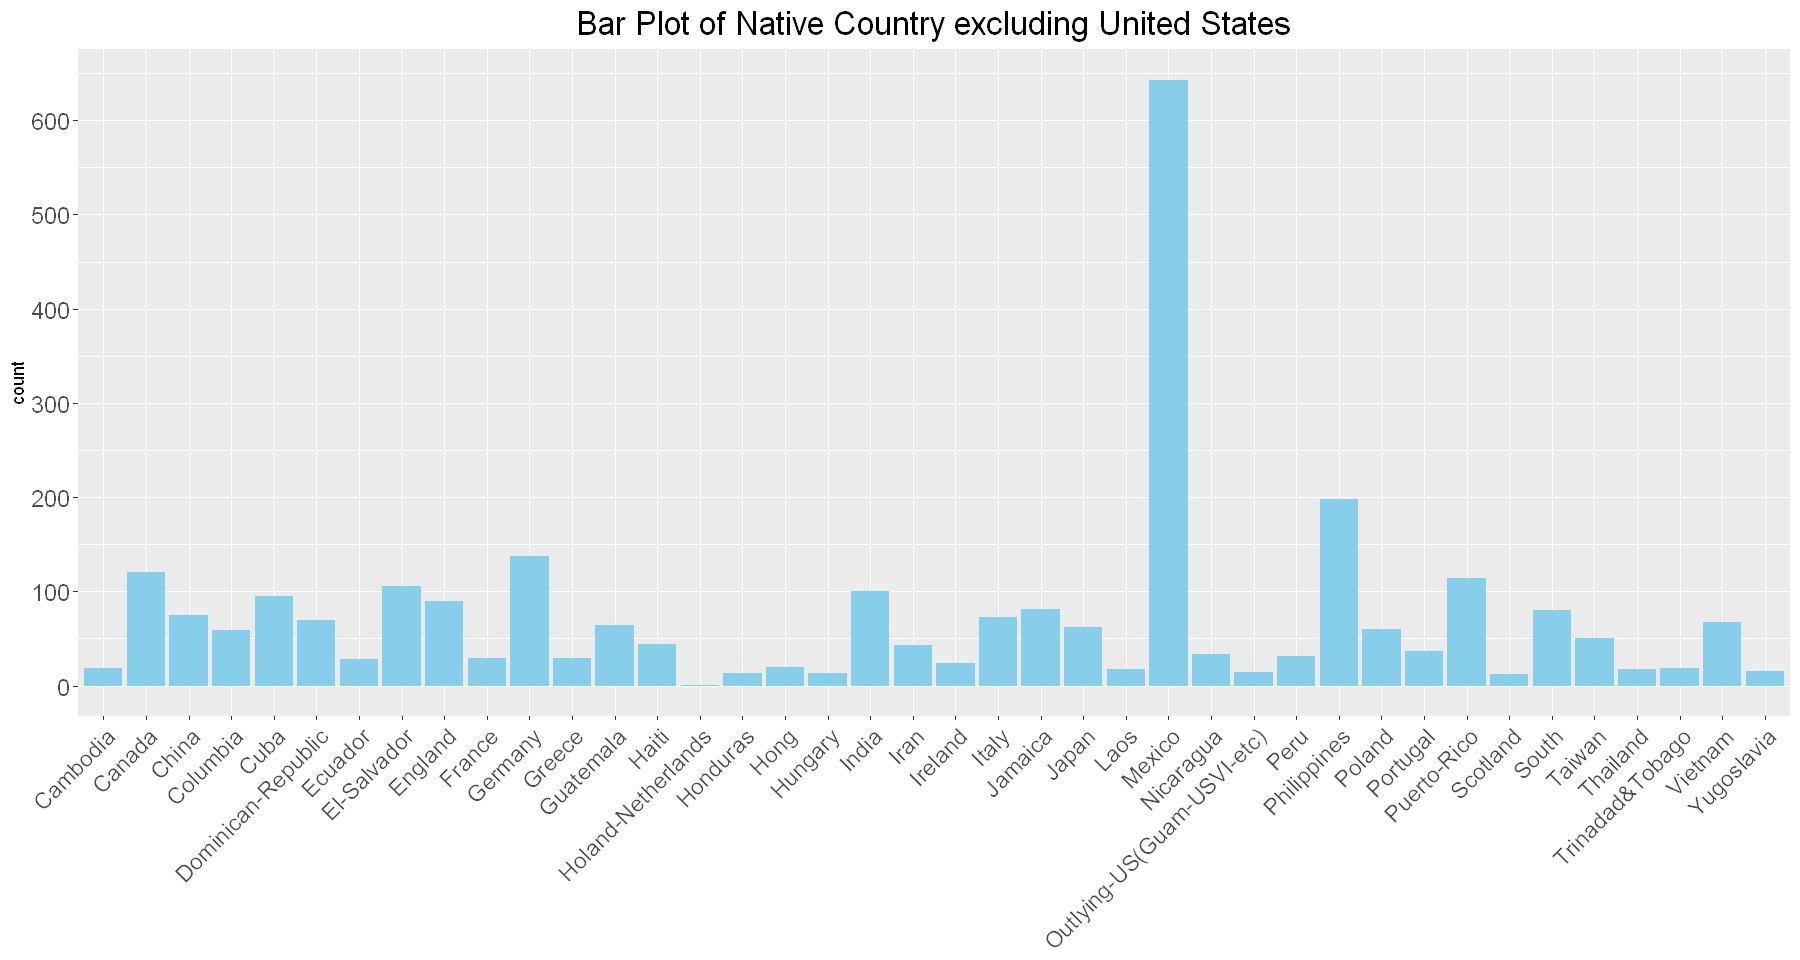

In [173]:
options(repr.plot.width=15, repr.plot.height=8)
country_barplot <- ggplot(subset(clean_data, native.country != "United-States"), aes(x = native.country)) +
  geom_bar(fill='skyblue') +
  labs(title = "Bar Plot of Native Country excluding United States") +
  scale_y_continuous(breaks = pretty_breaks(n = 7)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=20))
country_hist
ggsave("images/country_barplot.jpg", country_barplot, width = 15, height = 8, units = "in", dpi = 300)

In [184]:
mean(clean_data$native.country == "Mexico") * 100

[1] 2.022479

In [174]:
#how many percent of native.country data is united-states
mean(clean_data$native.country == 'United-States', na.rm = TRUE) * 100

[1] 91.18729

In [185]:
mean(clean_data$workclass == "Private") * 100

[1] 73.89012

In [186]:
mean(clean_data$race == "White") * 100

[1] 85.97858

#### Histograms

In [175]:
histograms <- lapply(numerical_columns, function(column) {
  ggplot(clean_data, aes_string(x = column)) +
    geom_histogram(bins = 30, fill = 'skyblue', color ='#476E7D', size = 0.6) +
    labs(title = column) +
    scale_y_continuous(breaks = pretty_breaks(n = 6)) +
    scale_x_continuous(breaks = pretty_breaks(n=8)) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size=14),
          axis.text.y = element_text(size=14),
          axis.title.x = element_blank(),
          plot.title = element_text(hjust = 0.5, size=20))
})

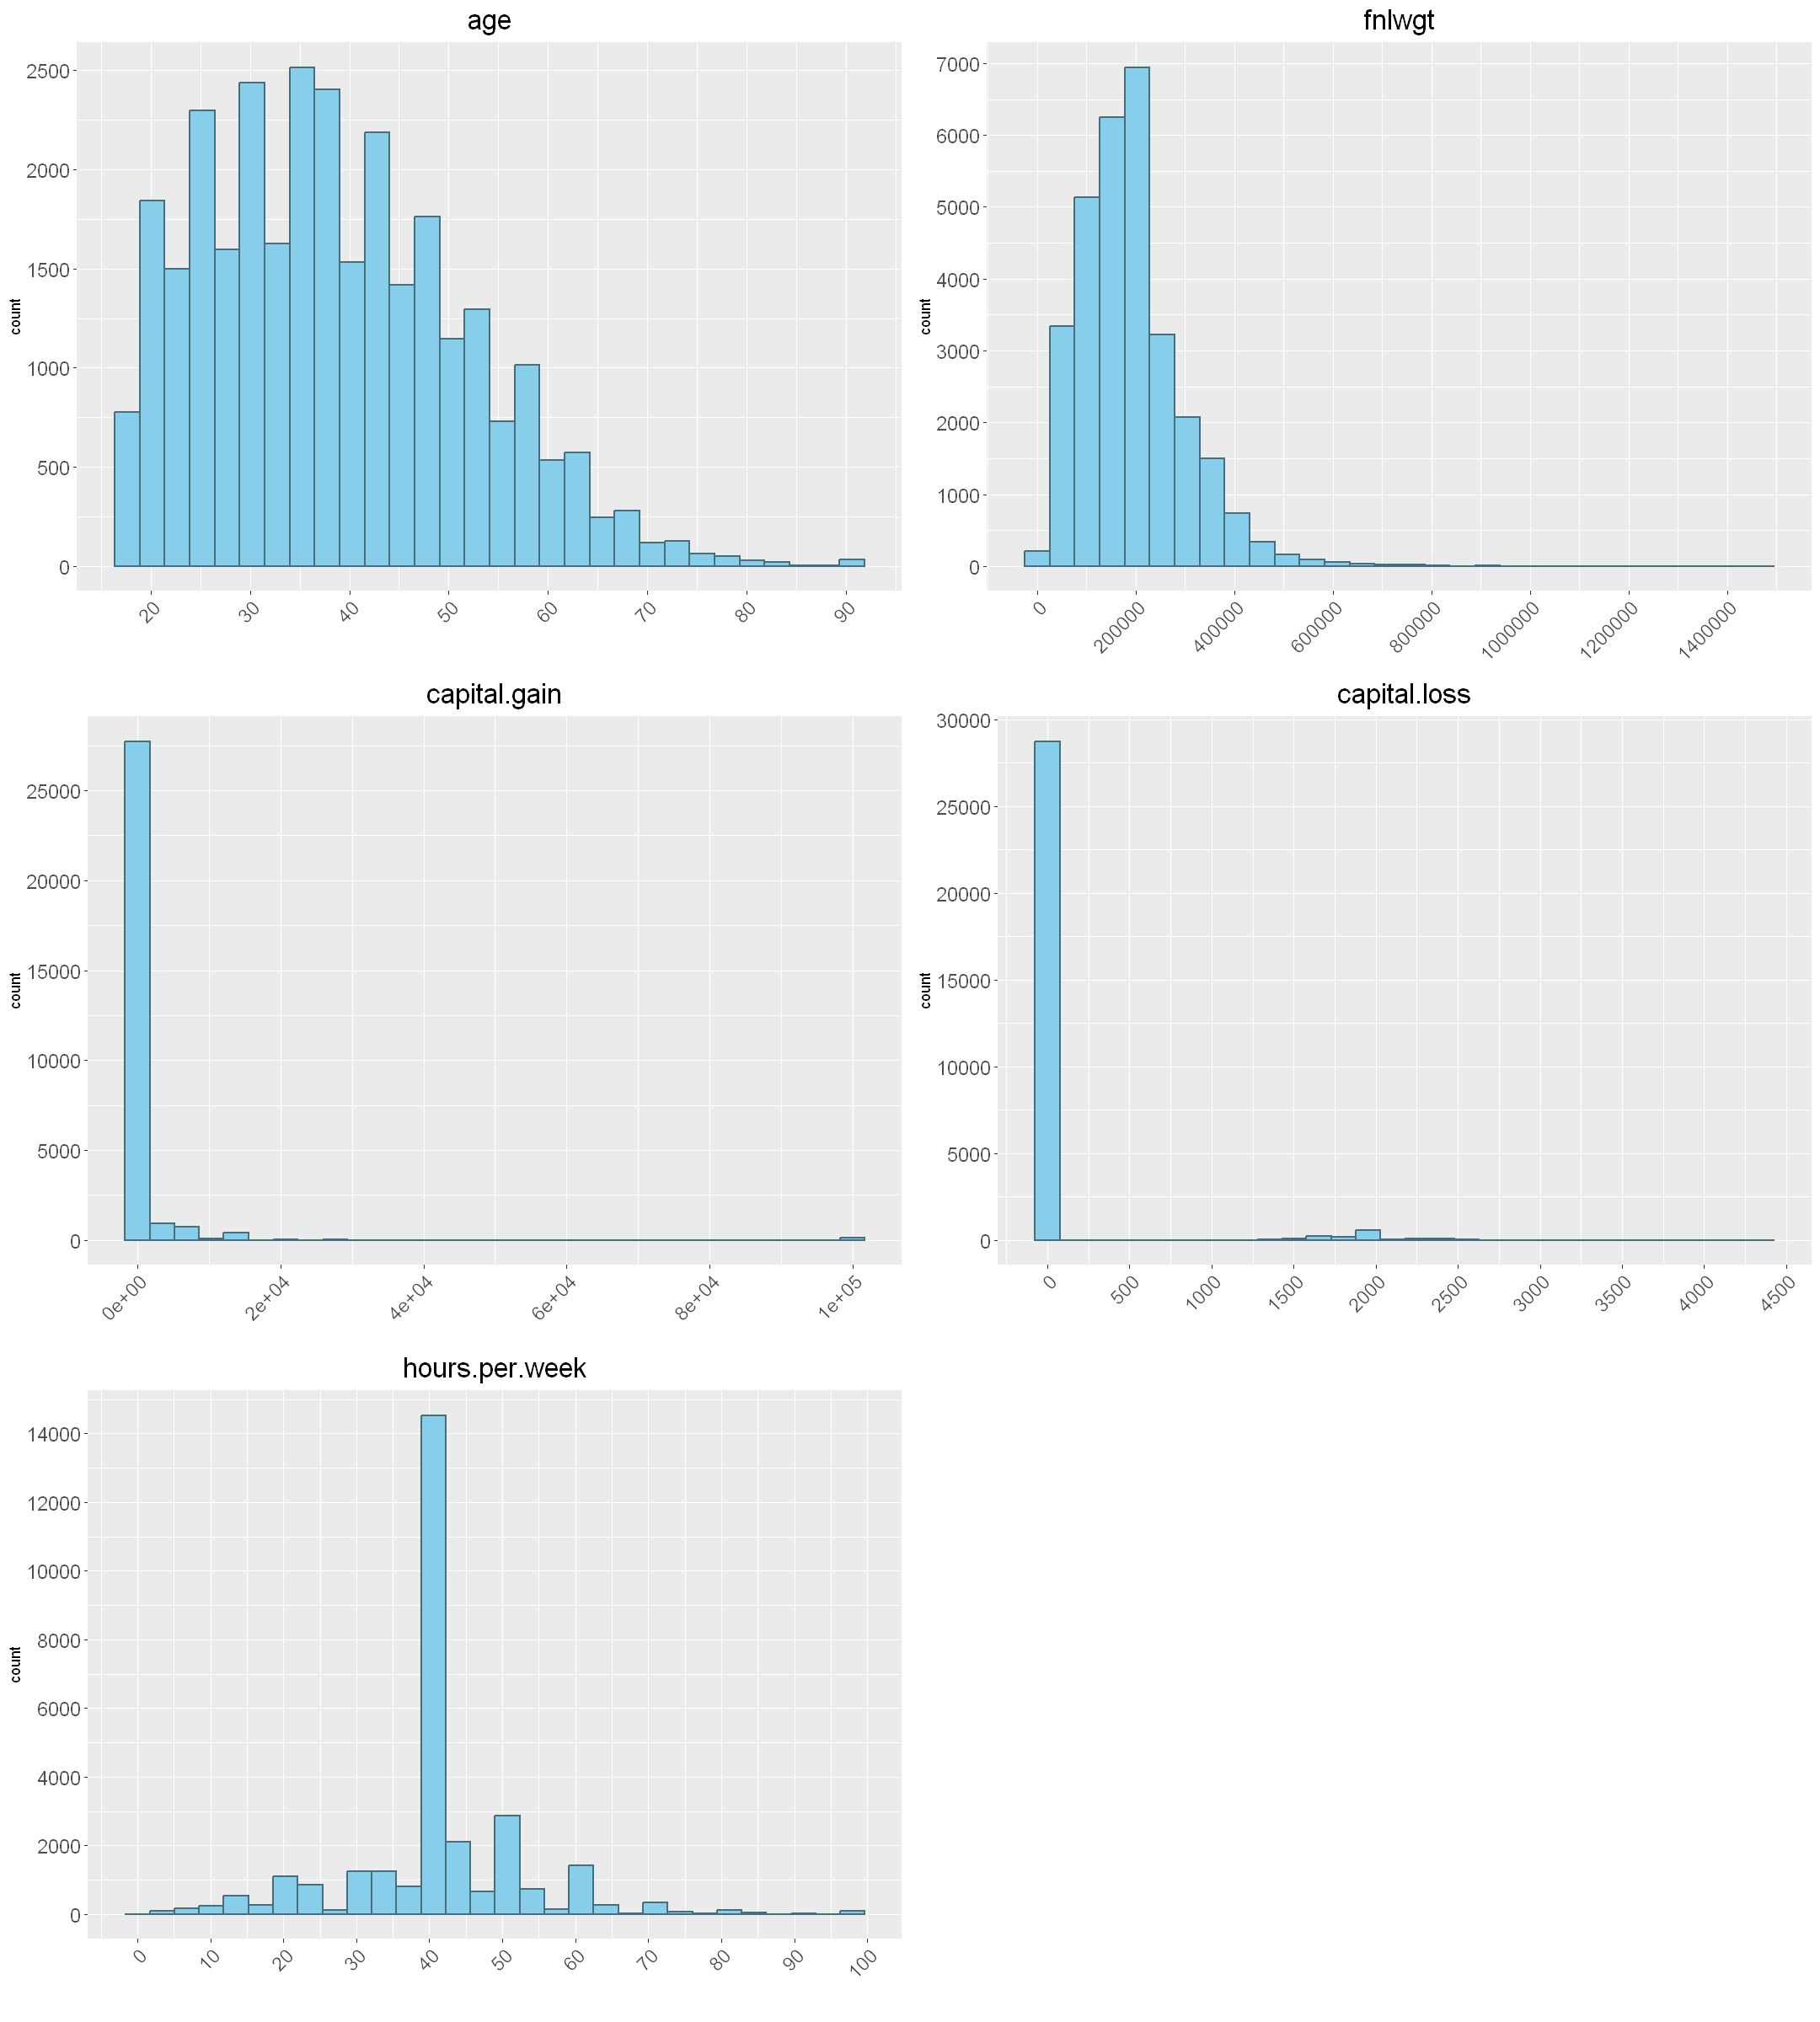

In [176]:
options(repr.plot.width=18, repr.plot.height=20)
hist1 <- plot_grid(plotlist = histograms, ncol = 2, align = "h")
hist1
ggsave("images/histograms1.jpg", hist1, width = 18, height = 20, units = "in", dpi = 300)

#### Boxplots

In [177]:
boxplots <- lapply(c('age', 'fnlwgt', 'hours.per.week'), function(column) {
  ggplot(clean_data, aes_string(y = column)) +
    geom_boxplot(fill = "skyblue", color = "#476E7D") +
    labs(title = paste(column)) +
    scale_y_continuous(breaks = pretty_breaks(n = 10)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size=14),
          axis.text.y = element_text(size=14),
          axis.title.y = element_text(size=14),
          axis.title.x = element_blank(),
          plot.title = element_text(hjust = 0.5, size=20))
})

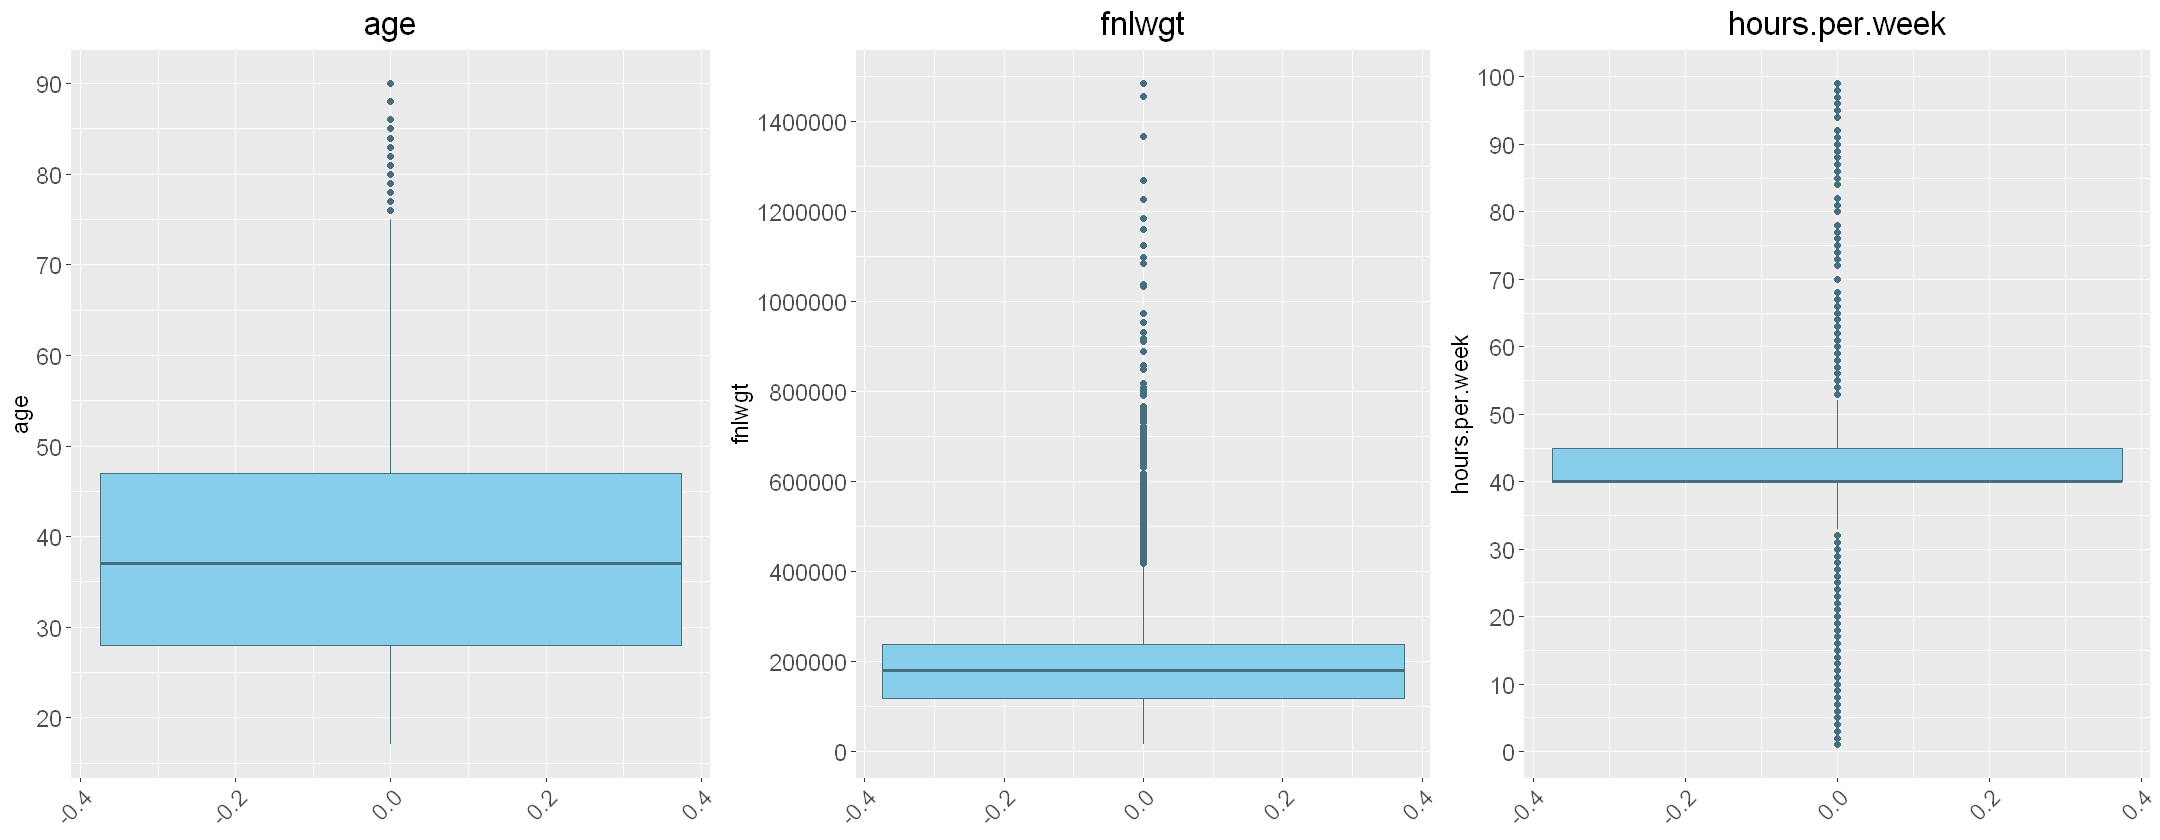

In [178]:
options(repr.plot.width=18, repr.plot.height=7)
boxplots1 <- plot_grid(plotlist = boxplots, ncol = 3, align = "h")
boxplots1
ggsave("images/boxplots1.jpg", boxplots1, width = 18, height = 7, units = "in", dpi = 300)

### Looking for dependencies

We have sometimes 99 hours worked per week. A litte bit too much. But maybe in some private companies or in hospital? Let's check relation ship of hours per week worked and occupation.

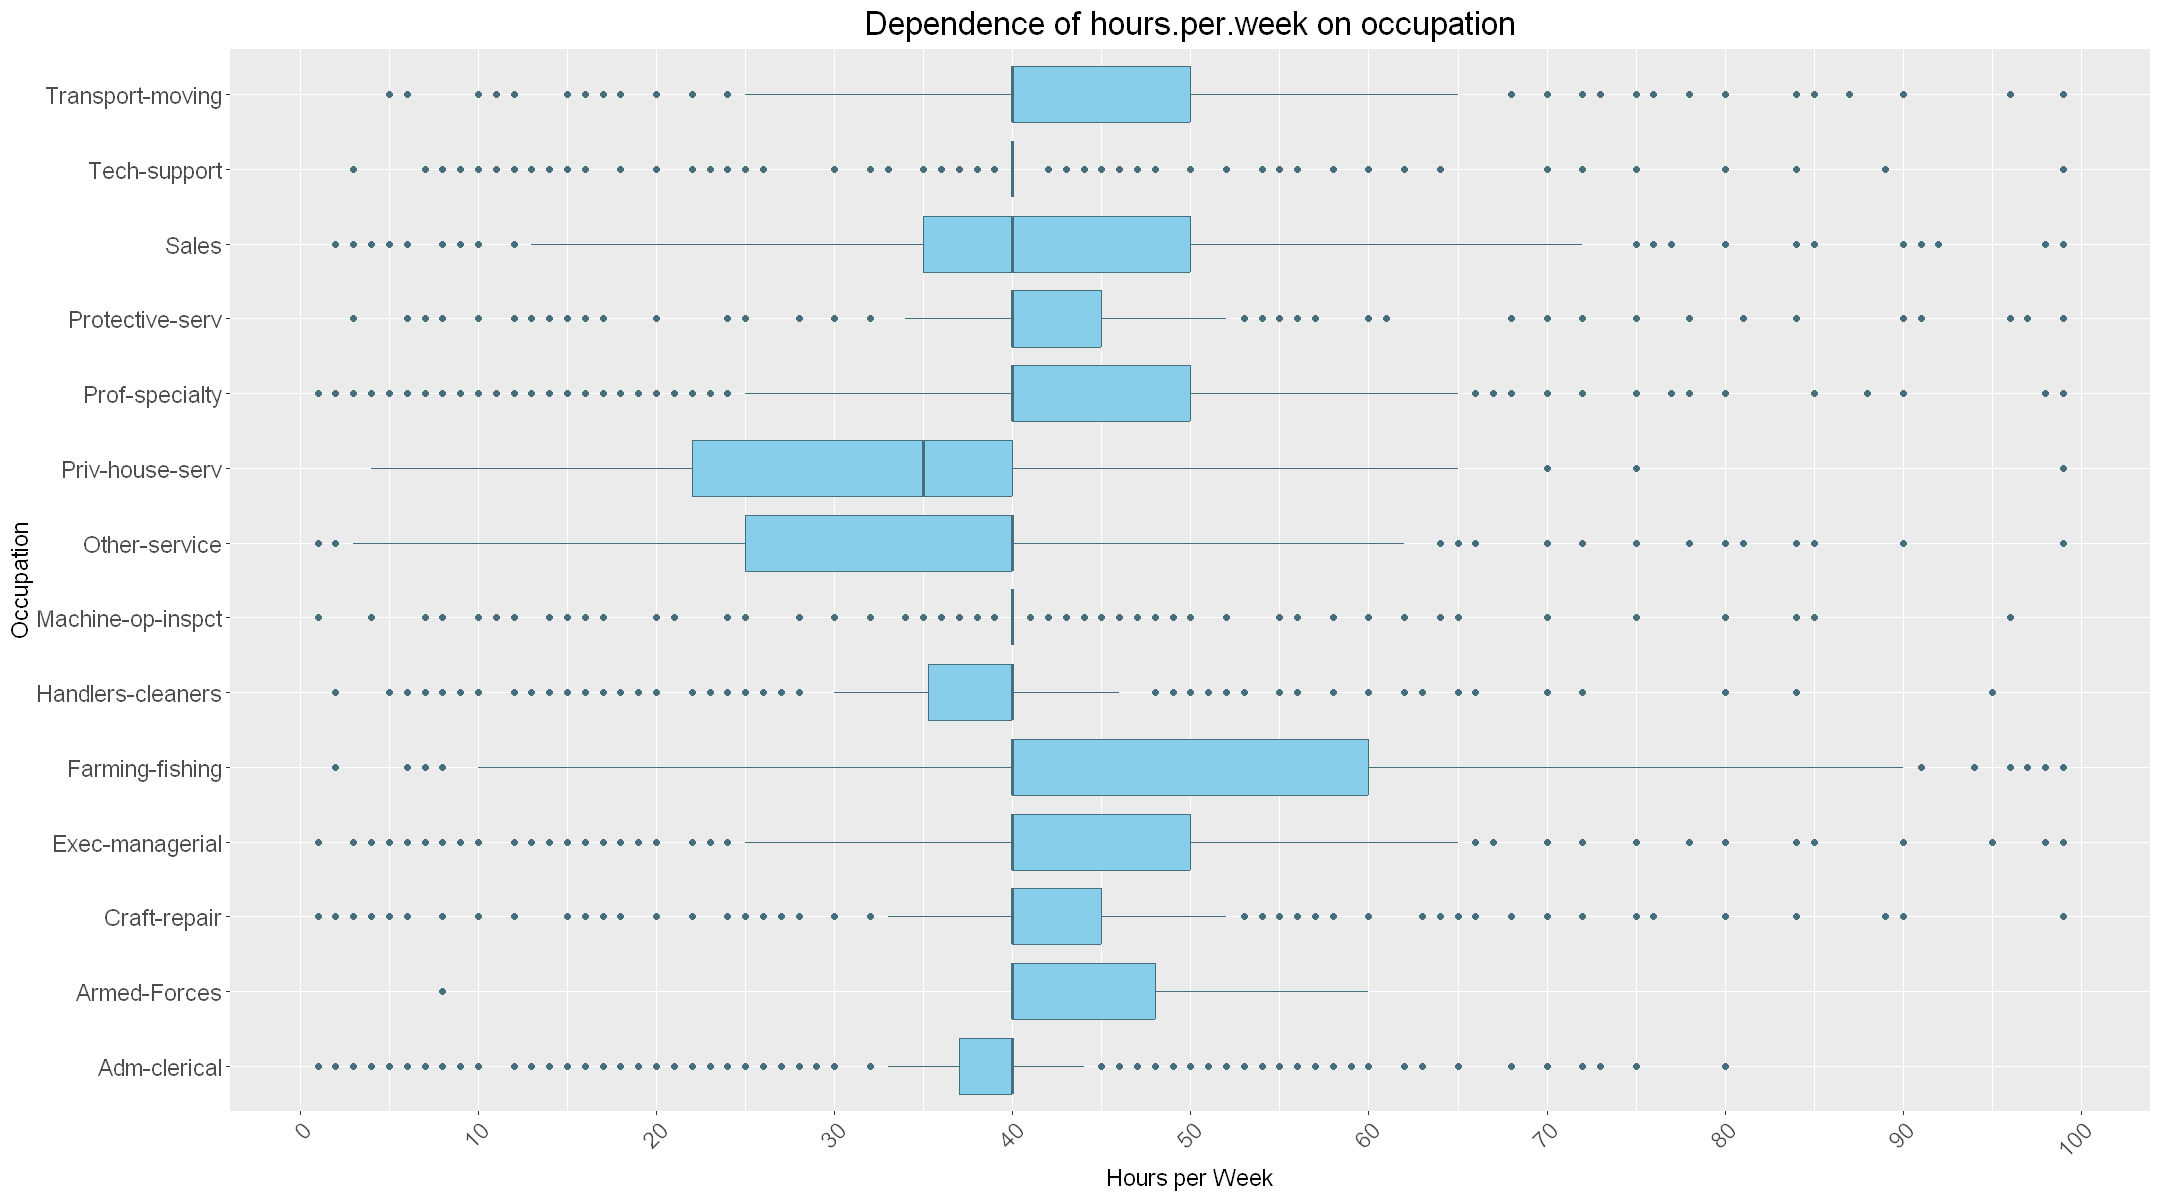

In [200]:
options(repr.plot.width=18, repr.plot.height=10)
hours_occup <- ggplot(clean_data, aes(x = occupation, y = hours.per.week)) +
geom_boxplot(fill = 'skyblue', color = "#476E7D") +
coord_flip() + 
scale_y_continuous(breaks = pretty_breaks(n = 10)) +
labs(title = "Dependence of hours.per.week on occupation", x = "Occupation", y = "Hours per Week") +
theme(axis.text.x = element_text(angle = 45, hjust = 1, size=14),
      axis.text.y = element_text(size=14),
      axis.title.y = element_text(size=14),
      axis.title.x = element_text(size=14),
      plot.title = element_text(hjust = 0.5, size=20))
hours_occup
ggsave("images/hours_occupation.jpg", hours_occup, width = 18, height = 10, units = "in", dpi = 300)

In [201]:
adult_data <- adult_data %>%
  mutate(age_group = cut(age, breaks = c(0, 10, 20, 30, 40, 50, 60, 70, 80, 90), labels = c("0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90")))

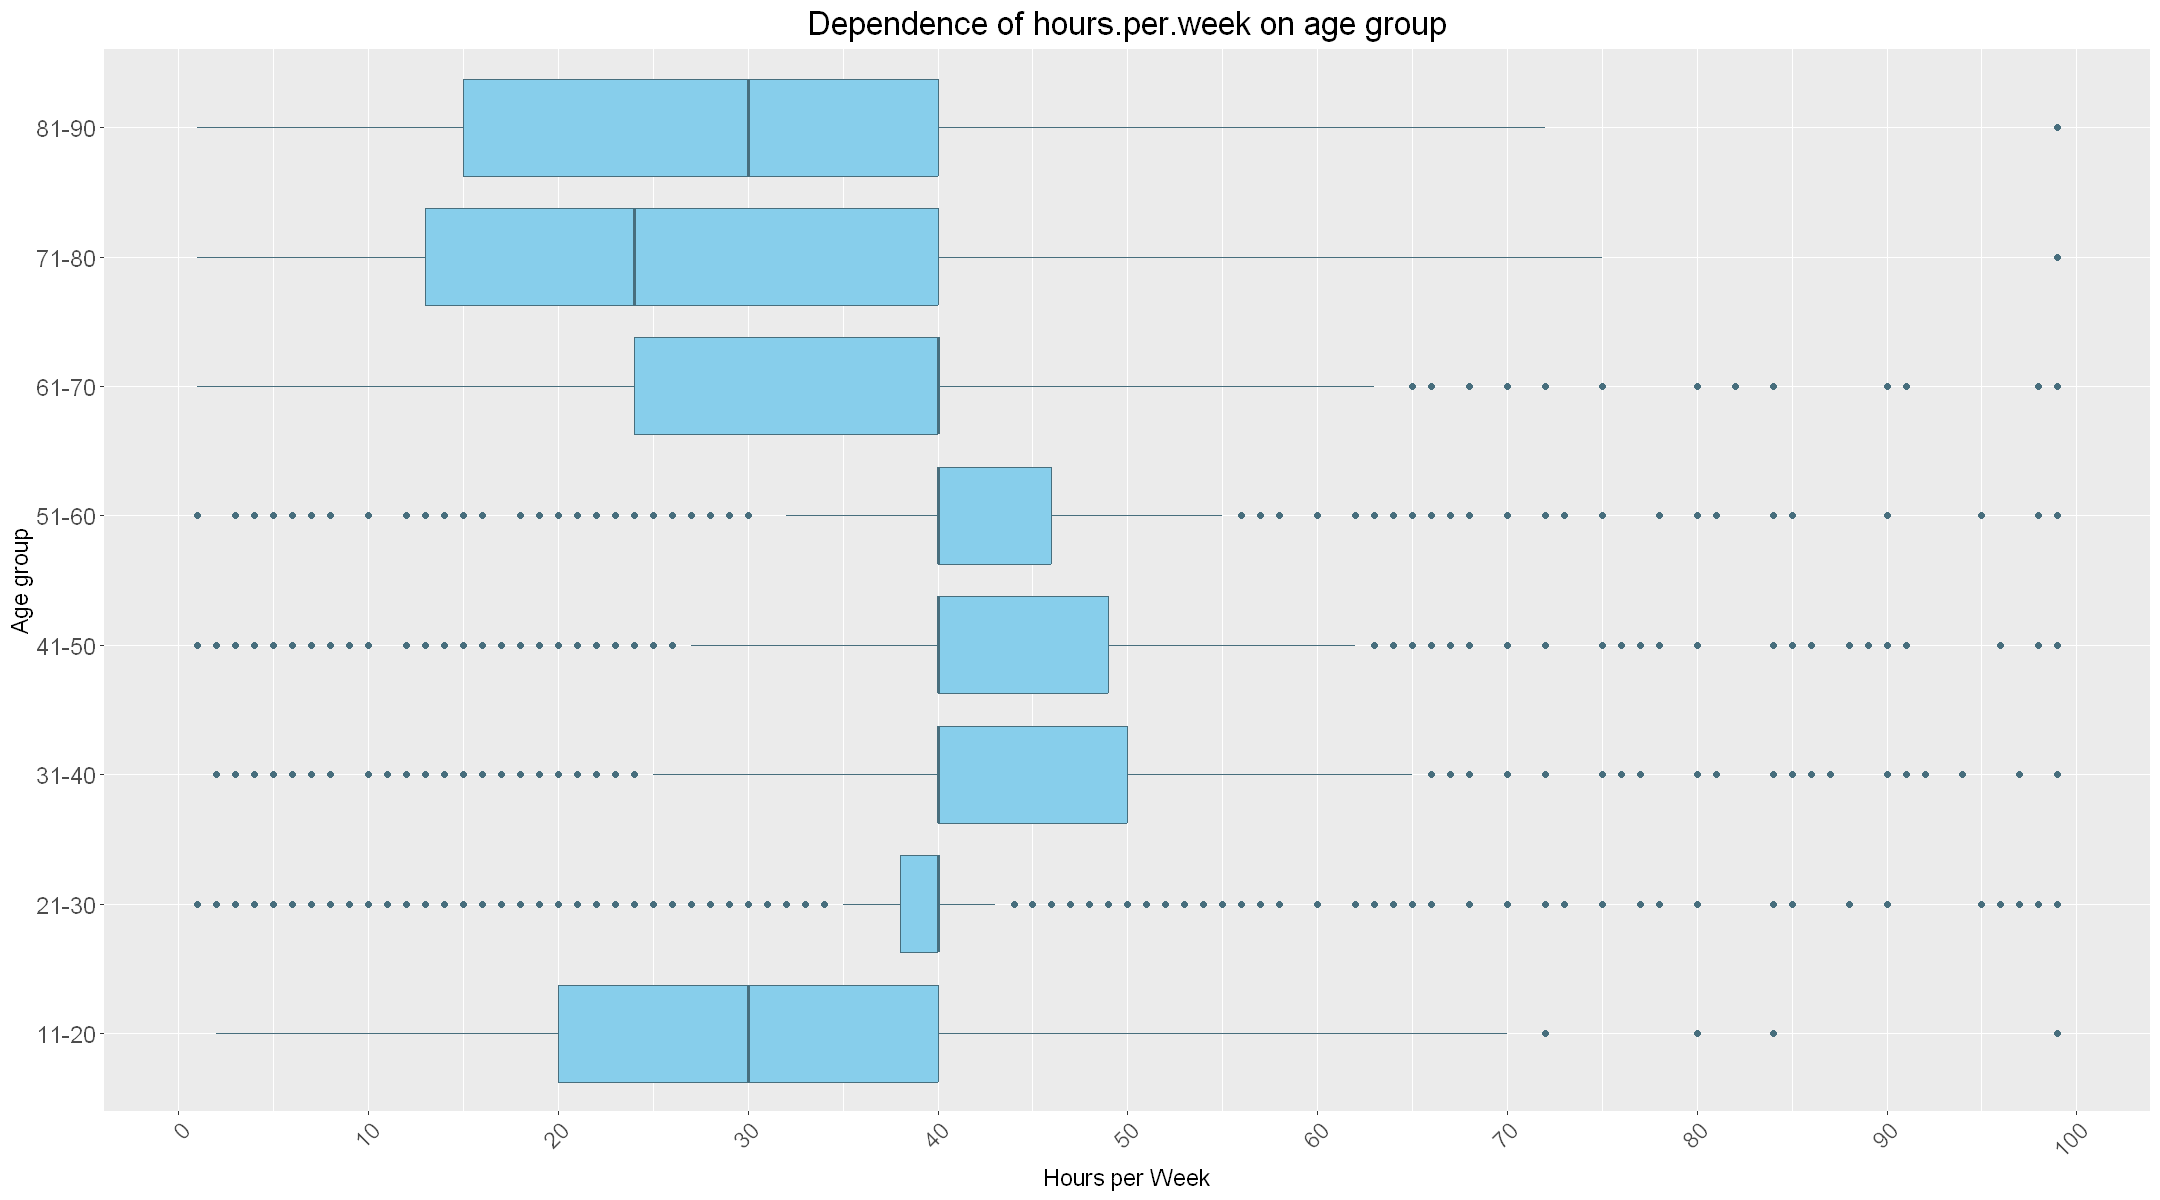

In [202]:
hours_age <- ggplot(adult_data, aes(x = age_group, y = hours.per.week)) +
geom_boxplot(fill = 'skyblue', color = "#476E7D") +
coord_flip() + 
scale_y_continuous(breaks = pretty_breaks(n = 10)) +
labs(title = "Dependence of hours.per.week on age group", x = "Age group", y = "Hours per Week") +
theme(axis.text.x = element_text(angle = 45, hjust = 1, size=14),
      axis.text.y = element_text(size=14),
      axis.title.y = element_text(size=14),
      axis.title.x = element_text(size=14),
      plot.title = element_text(hjust = 0.5, size=20))
hours_age
ggsave("images/hours_age.jpg", hours_age, width = 18, height = 10, units = "in", dpi = 300)

#### Check what is capital gain and loss

In [175]:
cor(adult_data$capital.gain, adult_data$capital.loss)

[1] -0.03161411

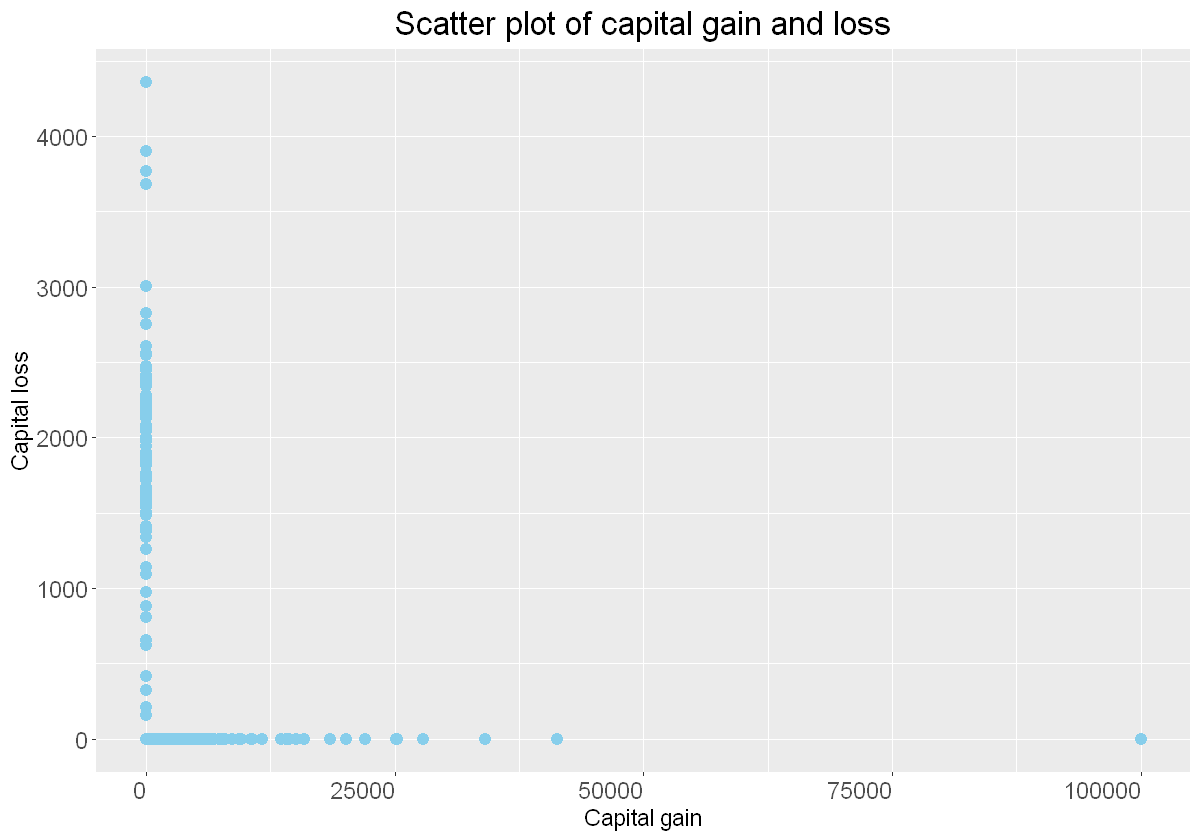

In [192]:
options(repr.plot.width=10, repr.plot.height=7)
capitals <- ggplot(clean_data, aes(x = capital.gain, y = capital.loss)) +
  geom_point(color='skyblue', size = 3) +
  labs(x = "Capital gain", y = "Capital loss",
       title = "Scatter plot of capital gain and loss") +
  theme(axis.text = element_text(hjust = 1, size=14),
        axis.title = element_text(size=14),
        plot.title = element_text(hjust = 0.5, size=20))
capitals
ggsave("images/capitals.jpg", capitals, width = 15, height = 10, units = "in", dpi = 300)

In [194]:
sum(clean_data$capital.gain == 0)
sum(clean_data$capital.loss == 0)

[1] 27624

[1] 28734

In [195]:
sum(clean_data$capital.gain == 0 & clean_data$capital.loss == 0)

[1] 26197

In [196]:
sum(clean_data$capital.gain == 0 & clean_data$capital.loss > 0)
sum(clean_data$capital.loss == 0 & clean_data$capital.gain > 0)

[1] 1427

[1] 2537

In [199]:
26197+1427+2537
nrow(clean_data)

[1] 30161

[1] 30161

#### Correlations

In [181]:
adult_data$income_binary <- ifelse(adult_data$income == ">50K", 1, 0)

correlations <- sapply(adult_data[factor_columns], function(column) {
  cor(adult_data$income_binary, as.numeric(column))
})

correlation_df <- data.frame(Correlation = correlations)

In [182]:
correlation_df

,Correlation
,<dbl>
workclass,NA
education,0.07931133
marital.status,-0.19929464
occupation,NA
relationship,-0.25092447
race,0.07185294
sex,0.21599500
native.country,NA
income,1.00000000


In [183]:
correlations_numerical <- sapply(adult_data[numerical_columns], function(column) {
  cor(adult_data$income_binary, column)
})

correlation_numerical_df <- data.frame(Correlation = correlations_numerical)

In [184]:
correlation_numerical_df

,Correlation
,<dbl>
age,0.234038777
fnlwgt,-0.009481166
capital.gain,0.223332549
capital.loss,0.150523406
hours.per.week,0.229689576


As the correlation between dependent variables increases, then decreases their usefulness. Some models require that features should be independent. Keeping high correlation between predictors may even decrease the performance. Let's take a look at the correlation matrix.

In [185]:
correlation_matrix <- cor(adult_data[sapply(adult_data, is.numeric)])
correlation_data <- reshape2::melt(correlation_matrix)

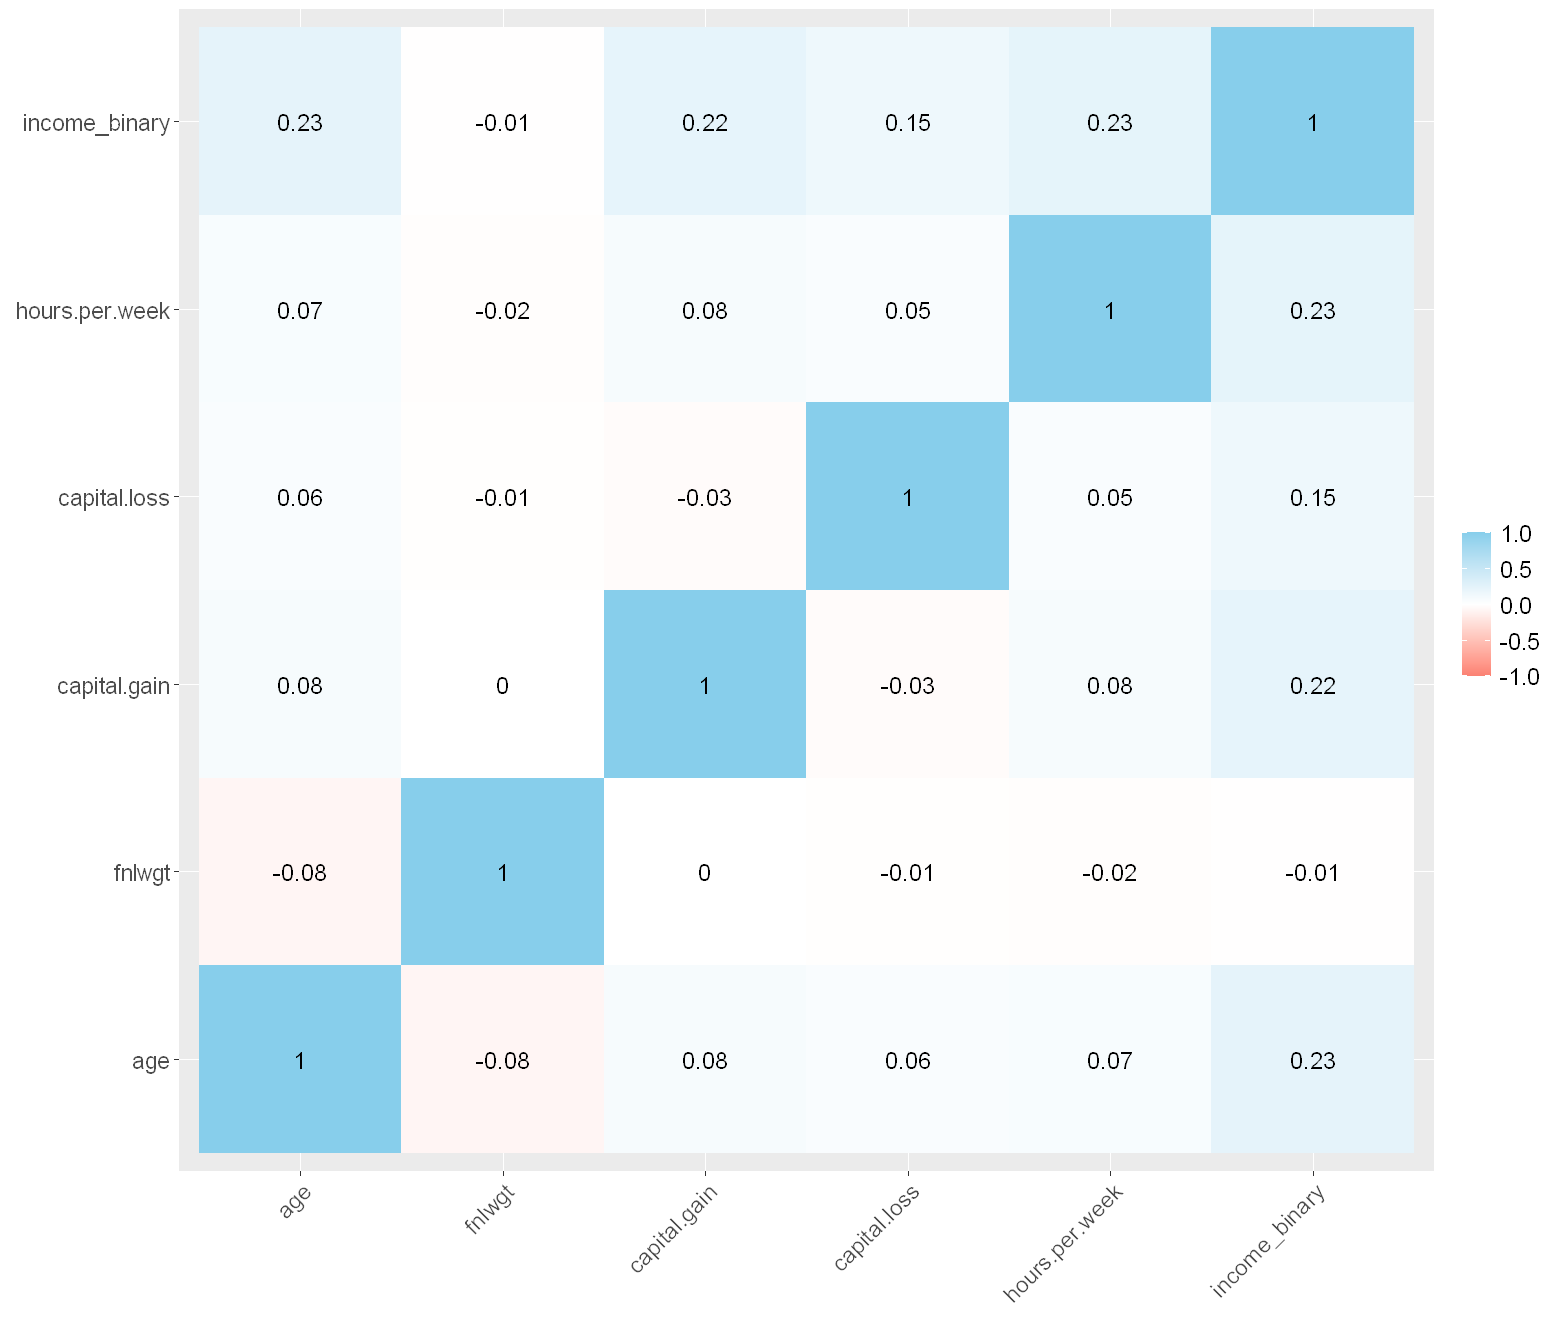

In [186]:
options(repr.plot.width=13, repr.plot.height=11)
ggplot(data = correlation_data, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "#FA8072", mid = "white", high = "#87CEEB",
                       midpoint = 0, limits = c(-1, 1), name = "") +
  geom_text(aes(label = round(value, 2)), size = 5) + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=14),  
        axis.text.y = element_text(size = 14),  
        axis.title = element_blank(),
        legend.position = "right",
        legend.text = element_text(size = 14))  

We shouldn't omit analysis of the dependency between categorical variables. For that, we will use the chi square test, which measure the independence in influencing the test statistics. The higher the p-value the more dependent the variables are. Let's plot the heatmap, in which each cell represents the p-value of the chi square test between two variables. 

In [187]:
#nie wiem jak to zrobić totalnie i czy w ogóle się da

#### Contigency tables

To check if some columns are imbalanced regarding income - then get rid off them.

In [199]:
#jesli usuniemy nany to mozna to zostawic i zrobic te cont na danych bez nanow, jesli nie usuwamy to to usunac

In [188]:
cont_table <- function(column) {
  result <- adult_data %>%
    group_by({{column}}, income, .drop = FALSE) %>%
    summarise(count = n(), .groups = "drop_last") %>%
    ungroup() %>%
    pivot_wider(names_from = {{column}}, values_from = count, values_fill = 0)
  return(result)
}

In [189]:
cont_table(workclass)

income,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,NA
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K,0,589,1476,7,17733,494,1817,944,14,1645
>50K,0,371,617,0,4963,622,724,353,0,191


In [83]:
cont_table(education)

income,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K,871,1115,400,162,317,606,487,802,1021,3133,107,8826,764,51,153,5904
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387


In [84]:
cont_table(marital.status)

income,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K,3980,13,8284,384,10191,959,908
>50K,463,10,6692,34,491,66,85


In [85]:
cont_table(occupation)

income,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,NA
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K,3262,8,3170,2098,879,1284,1752,3158,148,2281,438,2667,645,1277,1652
>50K,507,1,929,1968,115,86,250,137,1,1859,211,983,283,320,191


In [86]:
cont_table(relationship)

income,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
<fct>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K,7275,7448,944,5001,3228,823
>50K,5918,856,37,67,218,745


In [87]:
cont_table(race)

income,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
<fct>,<int>,<int>,<int>,<int>,<int>
<=50K,275,763,2737,246,20698
>50K,36,276,387,25,7117


In [88]:
cont_table(sex)

income,Female,Male
<fct>,<int>,<int>
<=50K,9592,15127
>50K,1179,6662


In [89]:
cont_table(native.country)

income,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,⋯,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,NA
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K,12,82,55,57,70,68,24,97,60,⋯,102,9,64,31,15,17,21998,62,10,437
>50K,7,39,20,2,25,2,4,9,30,⋯,12,3,16,20,3,2,7171,5,6,146


In [190]:
cont_table(age_group)

income,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
<=50K,0,2408,7482,6139,4328,2581,1335,361,85
>50K,0,2,680,2406,2655,1547,457,80,14


### Focus on income

Teraz się skupiamy na income, bo to będziemy chcieli klasyfikować.

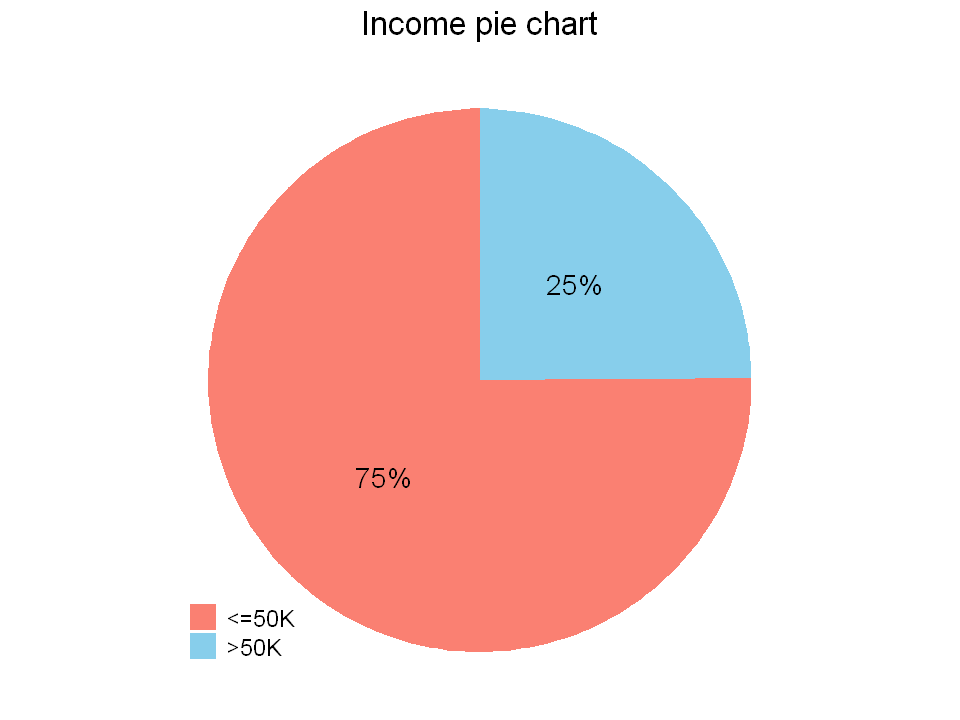

In [183]:
options(repr.plot.width=8, repr.plot.height=6)
pie_income <- ggplot(clean_data, aes(x="", fill=income)) +
    geom_bar(width=1) +
    coord_polar('y') +
    labs(title='Income pie chart', fill="") +
    theme_void() +
    scale_fill_manual(values = c("<=50K" = "salmon", ">50K" = "skyblue")) +
    geom_text(aes(label = paste0(round((..count..)/sum(..count..)*100), "%")),
              stat = "count", position = position_stack(vjust = 0.5), size = 6) +
    theme(legend.position = c(0.15, 0.15),
          plot.title = element_text(hjust = 0.5, size=20),
          legend.text = element_text(size = 14))
pie_income
ggsave("images/pie_income.jpg", pie_income, width = 8, height = 6, units = "in", dpi = 300)

#### Barplots

In [203]:
income_barplots <- lapply(head(factor_columns, -2), function(column) {
  ggplot(clean_data, aes_string(x = column, group = adult_data$income, fill = clean_data$income)) +
    geom_bar(position = 'dodge', aes(y = ..prop..)) +
    labs(title = paste("Income by", column), fill = "") +
    scale_y_continuous(breaks = seq(0, 1, by = 0.1), name = 'percentage') +
    scale_fill_manual(values = c("salmon", "skyblue")) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
          axis.text.y = element_text(size = 14),
          axis.title.x = element_text(size = 14),
          axis.title.y = element_text(size = 14),
          plot.title = element_text(hjust = 0.5, size = 20),
          legend.text = element_text(size = 14),
          legend.position="none")
})

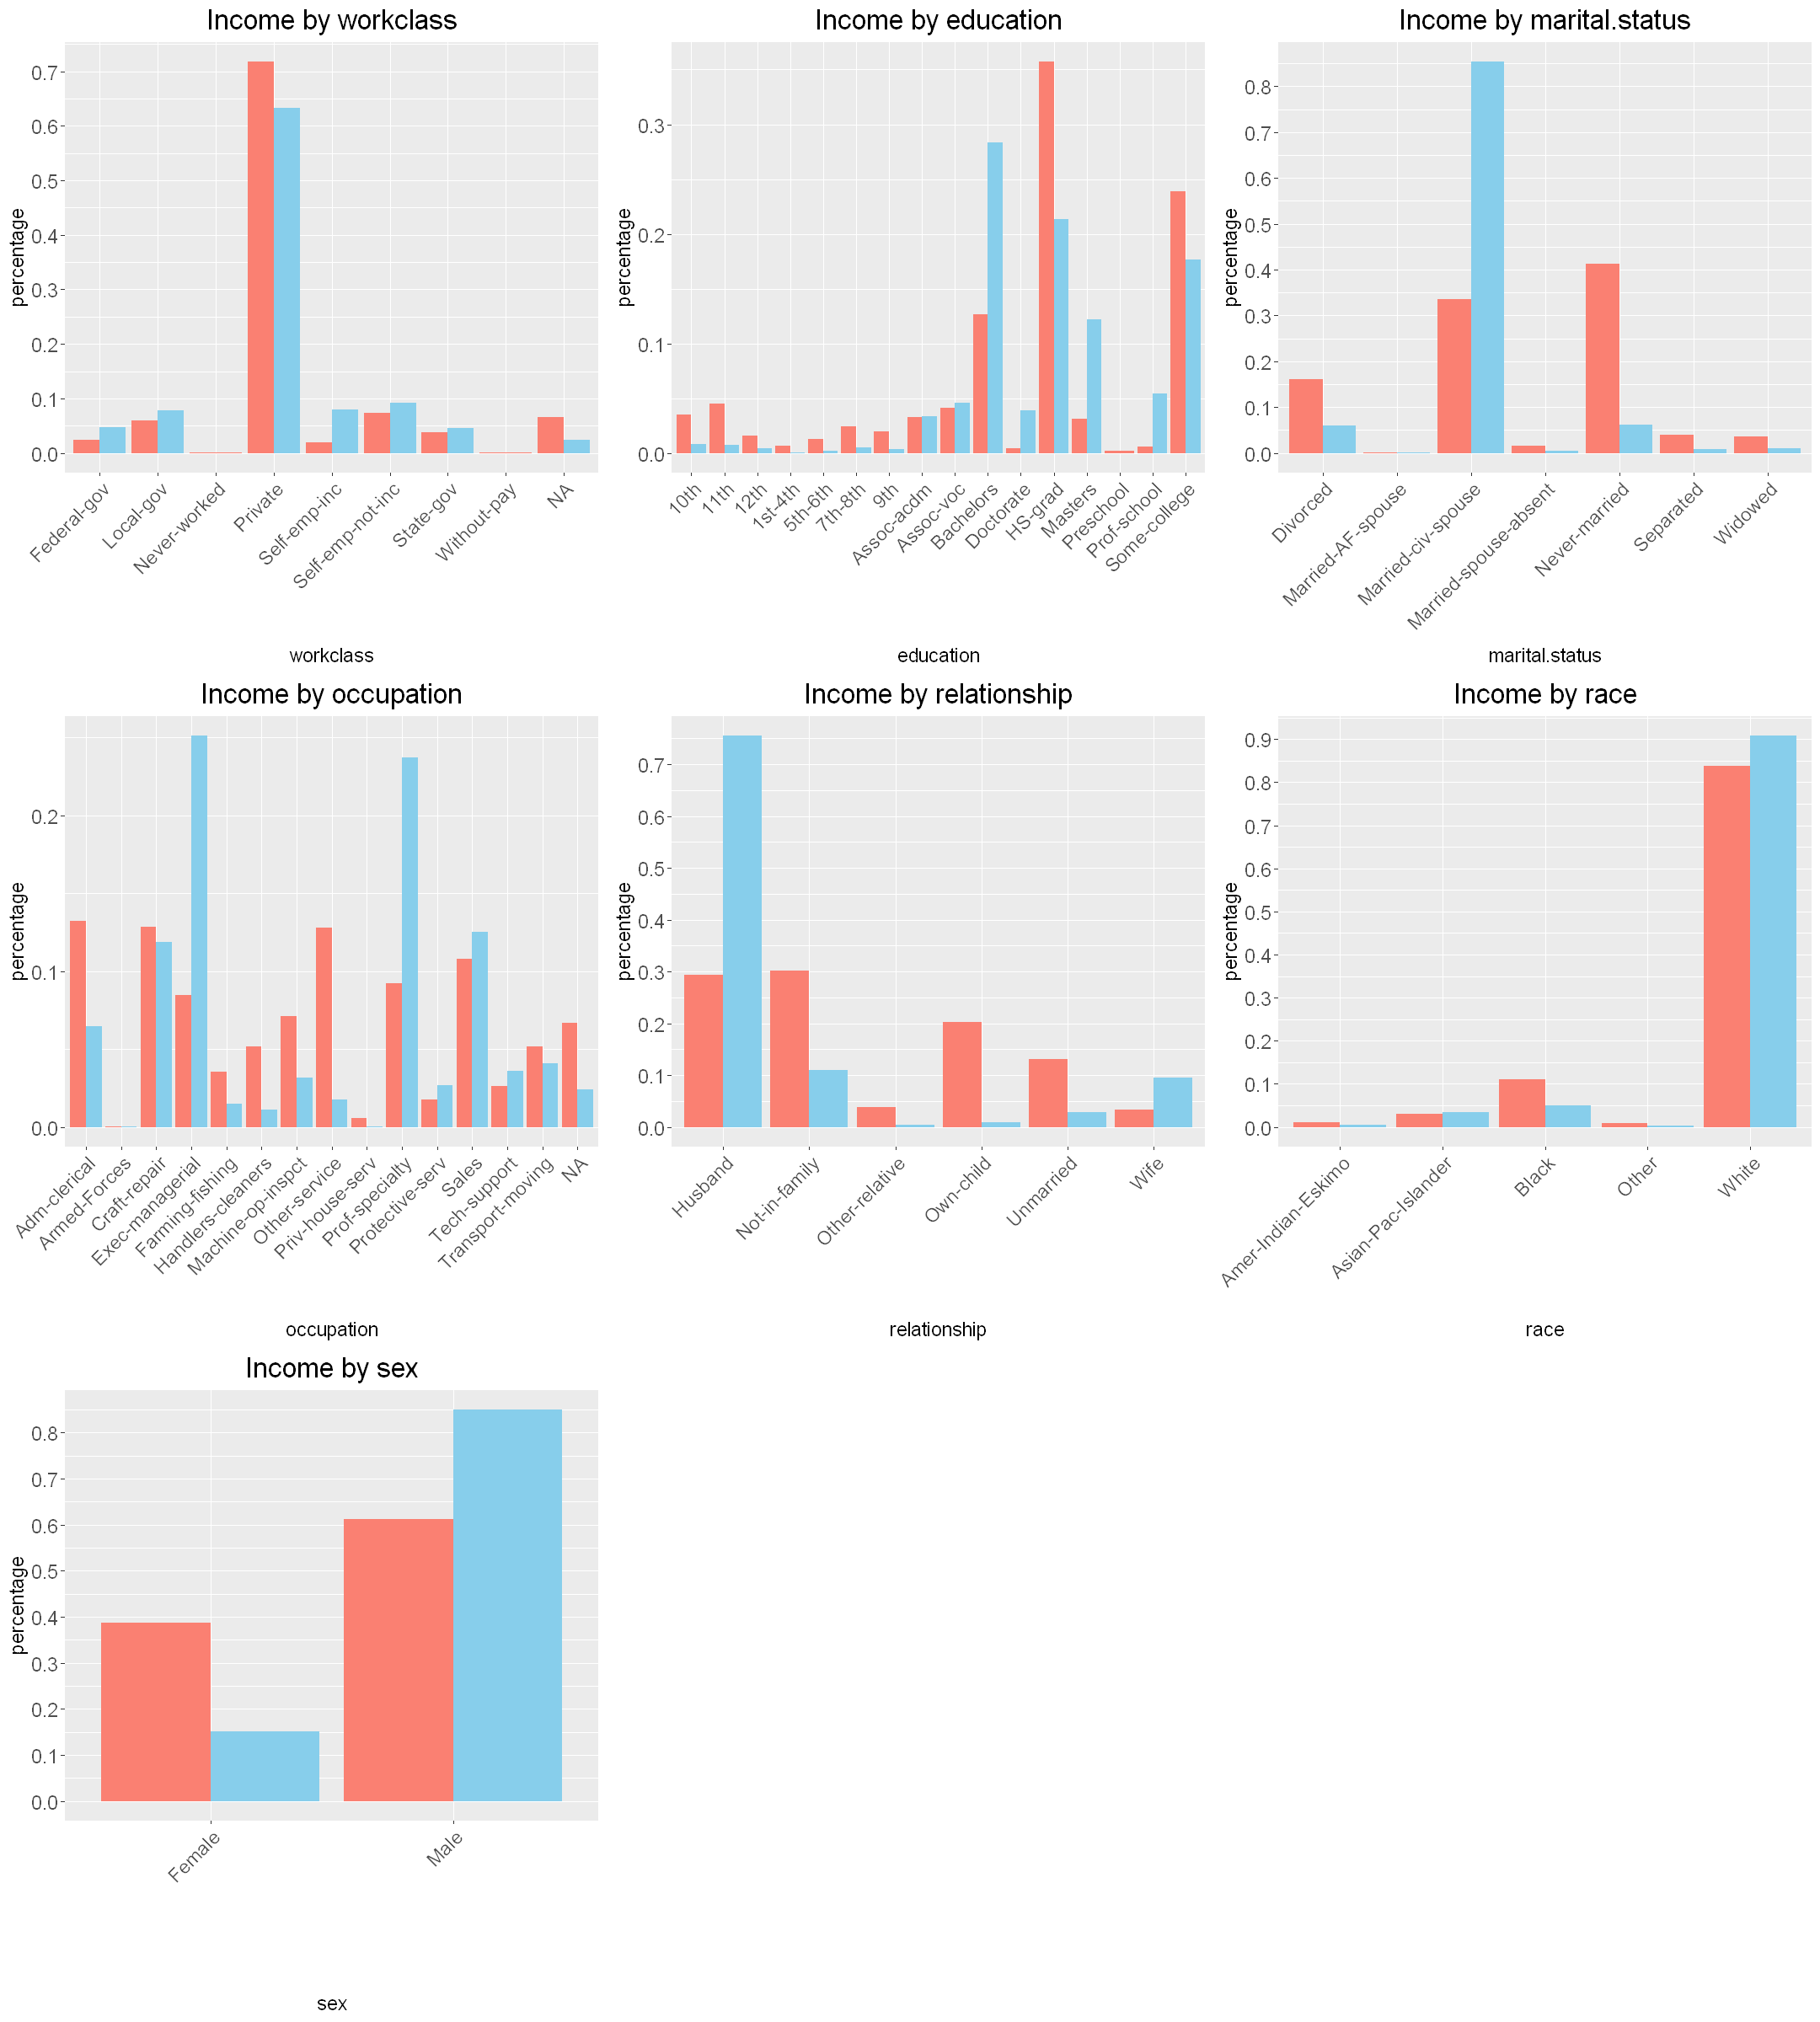

In [93]:
options(repr.plot.width=18, repr.plot.height=20)
plot_grid(plotlist = income_barplots, ncol = 3, align = "h")

In [94]:
income_density_by_age <- ggplot(adult_data, aes(x = age, fill = income, color=income)) +
                          geom_density(size=1, alpha=0.9) +
                          labs(title = "Density of Income by Age", x = "Age", y = "Density", fill = "Income", color='Income') +
                          scale_fill_manual(values = c("salmon", "skyblue")) +
                          scale_color_manual(values = c("#9C5048", "#476E7D"), guide = FALSE) +
                          scale_x_continuous(breaks = seq(0, 90, by = 10)) +
                          theme(axis.text.x = element_text(size = 14),
                              axis.text.y = element_text(size = 14),
                              axis.title.x = element_text(size = 14),
                              axis.title.y = element_text(size = 14),
                              plot.title = element_text(hjust = 0.5, size = 20),
                              legend.text = element_text(size = 14),
                              legend.position="none")
income_density_by_hours <- ggplot(adult_data, aes(x = hours.per.week, fill = income, color=income)) +
                          geom_density(size=1, alpha=0.9) +
                          labs(title = "Density of Income by Hours per week", x = "Hours per week", y = "Density", fill = "Income", color='Income') +
                          scale_fill_manual(values = c("salmon", "skyblue")) +
                          scale_color_manual(values = c("#9C5048", "#476E7D"), guide = FALSE) +
                          theme(axis.text.x = element_text(size = 14),
                              axis.text.y = element_text(size = 14),
                              axis.title.x = element_text(size = 14),
                              axis.title.y = element_text(size = 14),
                              plot.title = element_text(hjust = 0.5, size = 20),
                              legend.text = element_text(size = 14),
                              legend.position="none")

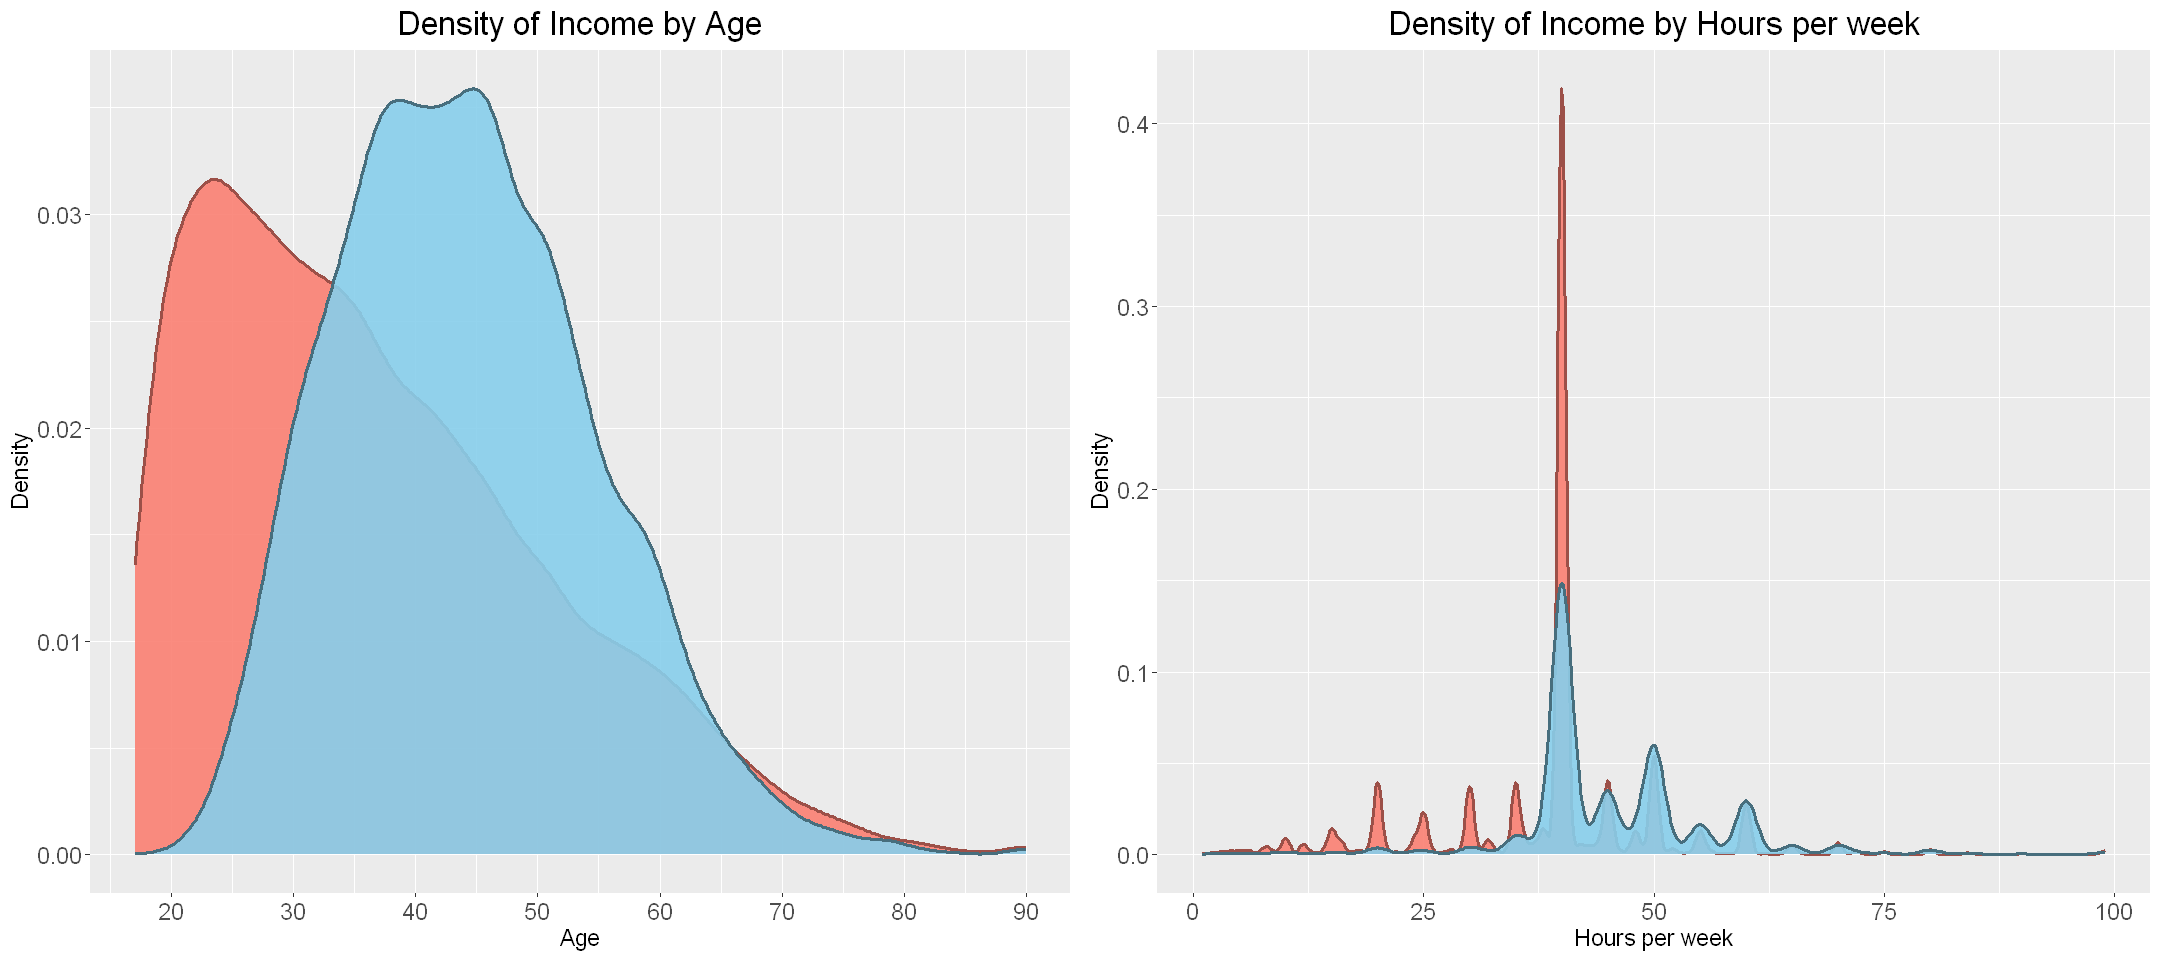

In [95]:
options(repr.plot.width=18, repr.plot.height=8)
plot_grid(income_density_by_age, income_density_by_hours, ncol = 2, align = "h")